# Initialise Spark context

In [1]:
#def init_spark():
    import pyspark
    from pyspark import SparkConf, SparkContext
    from pyspark.sql import SparkSession
    import pyspark.sql.functions as F

    # start the session
    conf = SparkConf().setAppName('*')
    conf.set('spark.driver.cores', '5')
    conf.set('spark.driver.memory', '40G')
    conf.set('spark.driver.maxResultSize', '40G')
    conf.set('spark.executor.cores', '10')
    conf.set('spark.executor.instances', '20')
    conf.set('spark.executor.memory', '40G')
    conf.set('spark.executor.memoryOverhead', '10G')
    conf.set('spark.kryoserializer.buffer.max', '2047')
    conf.set('spark.locality.wait', '0')
    conf.set('spark.port.maxRetries', '128')
    conf.set('spark.scheduler.minRegisteredResourcesRatio', '1')
    conf.set('spark.network.timeout', '500')
    conf.set('spark.dynamicAllocation.enabled', 'False')
    conf.set('spark.shuffle.service.enabled', 'False')
    conf.set('spark.sql.legacy.allowCreatingManagedTableUsingNonemptyLocation', 'True')
    conf.set("spark.sql.broadcastTimeout", "1800")
    sc = SparkContext(conf = conf)
    spark = SparkSession(sc)


# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pyspark.sql.functions import col
from pyspark.sql import DataFrame
from pyspark.sql.functions import col, count, approx_count_distinct
import re
from pyspark.sql.functions import to_date, col, regexp_replace

#Smote
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Statistics
from scipy.stats import chi2_contingency
#sklearn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
# Import the split function from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

#### Getting the data from bdp

In [25]:
hive_query = '''
SELECT
    *
FROM
dev_sce_analysis.sm_psicle_price_increase_data
'''

In [26]:
load_df = spark.sql(hive_query)

In [39]:
load_df.count()

Py4JJavaError: An error occurred while calling o109.count.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 9.0 failed 4 times, most recent failure: Lost task 0.3 in stage 9.0 (TID 40, pbdpd05zafsrh.vodacom.corp, executor 3): java.io.FileNotFoundException: File does not exist: /zaf/lts/hive/dev/sce_analysis/sm_psicle_price_increase_data/part-00000-240beb15-4c4c-4b5b-ac91-bfa9c9701e21-c000.snappy.orc
	at org.apache.hadoop.hdfs.server.namenode.INodeFile.valueOf(INodeFile.java:87)
	at org.apache.hadoop.hdfs.server.namenode.INodeFile.valueOf(INodeFile.java:77)
	at org.apache.hadoop.hdfs.server.namenode.FSDirStatAndListingOp.getBlockLocations(FSDirStatAndListingOp.java:159)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.getBlockLocations(FSNamesystem.java:2040)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.getBlockLocations(NameNodeRpcServer.java:738)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.getBlockLocations(ClientNamenodeProtocolServerSideTranslatorPB.java:454)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$ClientNamenodeProtocol$2.callBlockingMethod(ClientNamenodeProtocolProtos.java)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine.java:533)
	at org.apache.hadoop.ipc.RPC$Server.call(RPC.java:1070)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:994)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:922)
	at java.security.AccessController.doPrivileged(Native Method)
	at javax.security.auth.Subject.doAs(Subject.java:422)
	at org.apache.hadoop.security.UserGroupInformation.doAs(UserGroupInformation.java:1899)
	at org.apache.hadoop.ipc.Server$Handler.run(Server.java:2899)

It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:127)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:177)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:101)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.scan_nextBatch_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:645)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:125)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:55)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$14.apply(Executor.scala:459)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1334)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:465)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1935)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1923)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1922)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1922)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:953)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:953)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:953)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2156)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2105)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2094)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:764)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2094)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2115)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2134)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2159)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:990)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:385)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:989)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:314)
	at org.apache.spark.sql.Dataset$$anonfun$count$1.apply(Dataset.scala:2836)
	at org.apache.spark.sql.Dataset$$anonfun$count$1.apply(Dataset.scala:2835)
	at org.apache.spark.sql.Dataset$$anonfun$53.apply(Dataset.scala:3369)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:80)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:127)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:75)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$withAction(Dataset.scala:3368)
	at org.apache.spark.sql.Dataset.count(Dataset.scala:2835)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.io.FileNotFoundException: File does not exist: /zaf/lts/hive/dev/sce_analysis/sm_psicle_price_increase_data/part-00000-240beb15-4c4c-4b5b-ac91-bfa9c9701e21-c000.snappy.orc
	at org.apache.hadoop.hdfs.server.namenode.INodeFile.valueOf(INodeFile.java:87)
	at org.apache.hadoop.hdfs.server.namenode.INodeFile.valueOf(INodeFile.java:77)
	at org.apache.hadoop.hdfs.server.namenode.FSDirStatAndListingOp.getBlockLocations(FSDirStatAndListingOp.java:159)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.getBlockLocations(FSNamesystem.java:2040)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.getBlockLocations(NameNodeRpcServer.java:738)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.getBlockLocations(ClientNamenodeProtocolServerSideTranslatorPB.java:454)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$ClientNamenodeProtocol$2.callBlockingMethod(ClientNamenodeProtocolProtos.java)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine.java:533)
	at org.apache.hadoop.ipc.RPC$Server.call(RPC.java:1070)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:994)
	at org.apache.hadoop.ipc.Server$RpcCall.run(Server.java:922)
	at java.security.AccessController.doPrivileged(Native Method)
	at javax.security.auth.Subject.doAs(Subject.java:422)
	at org.apache.hadoop.security.UserGroupInformation.doAs(UserGroupInformation.java:1899)
	at org.apache.hadoop.ipc.Server$Handler.run(Server.java:2899)

It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:127)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:177)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:101)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.scan_nextBatch_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:645)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:125)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:55)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$14.apply(Executor.scala:459)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1334)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:465)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [28]:
pandas_df = load_df.toPandas()

In [29]:
s = pandas_df

In [30]:
pandas_df =s

In [31]:
pandas_df.head()

vas_code actual_premium  tenure one_yr_loss_ratio three_yr_loss_ratio  \
0     IC10         313,04      60                 0                   0   
1    VIC01         374,33      60                 0                   0   
2    VIC01             41      60                 0                   0   
3    VIC01         103,08      60                 0                   0   
4     IC05            100       9                 0                   0   

  one_yr_lr_band three_yr_lr_band lr_increase         tp_2        psr_2  ...  \
0    a: 0 to 20%      a: 0 to 20%           0  145,4095393  2,152840039  ...   
1    a: 0 to 20%      a: 0 to 20%           0  469,3958033  0,797471052  ...   
2    a: 0 to 20%      a: 0 to 20%           0  15,69066892  2,613017979  ...   
3    a: 0 to 20%      a: 0 to 20%           0   62,9158163   1,63837976  ...   
4    a: 0 to 20%      a: 0 to 20%           0  171,1076117  0,584427537  ...   

  one_yr_all three_yr_all five_yr_all one_yr_claims three_yr_claims  \
0          0            0           0             0               0   
1          0            0           0             0               0   
2          0            0           0             0               0   
3          0            0           0             0               0   
4          0            0           0             0               0   

  five_yr_claims net_th_lo net_ad_replace  net_ad_repair   map_age  
0              0         0              0              0  41 to 50  
1              0         0              0              0  51 to 60  
2              0         0              0              0  51 to 60  
3              0         0              0              0  41 to 50  
4              0         0              0              0  41 to 50  

[5 rows x 38 columns]

In [32]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444999 entries, 0 to 444998
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   vas_code                        444999 non-null  object
 1   actual_premium                  444999 non-null  object
 2   tenure                          444999 non-null  int32 
 3   one_yr_loss_ratio               444999 non-null  object
 4   three_yr_loss_ratio             444999 non-null  object
 5   one_yr_lr_band                  444999 non-null  object
 6   three_yr_lr_band                444999 non-null  object
 7   lr_increase                     444999 non-null  object
 8   tp_2                            444999 non-null  object
 9   psr_2                           444999 non-null  object
 10  psr_2_increase_loading          444999 non-null  object
 11  premium_increase                444999 non-null  object
 12  new_premium_2                 

In [33]:
flt_columns = ["one_yr_loss_ratio", "three_yr_loss_ratio", "lr_increase", "tp_2", "psr_2", "psr_2_increase_loading", \
               "premium_increase", "new_premium_2", "new_premium_psr", "monetary_increase", "gross_ad_repair", \
               "gross_ad_replace", "gross_th_lo"]

# Converting to float format
for col_name in flt_columns:
    pandas_df[col_name] = pandas_df[col_name].str.replace(',', '.').astype(float)

In [34]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444999 entries, 0 to 444998
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   vas_code                        444999 non-null  object 
 1   actual_premium                  444999 non-null  object 
 2   tenure                          444999 non-null  int32  
 3   one_yr_loss_ratio               444999 non-null  float64
 4   three_yr_loss_ratio             444999 non-null  float64
 5   one_yr_lr_band                  444999 non-null  object 
 6   three_yr_lr_band                444999 non-null  object 
 7   lr_increase                     444999 non-null  float64
 8   tp_2                            444999 non-null  float64
 9   psr_2                           444999 non-null  float64
 10  psr_2_increase_loading          444999 non-null  float64
 11  premium_increase                444999 non-null  float64
 12  new_premium_2   

In [35]:
pandas_df.shape

(444999, 38)

In [36]:
pandas_df.count()

vas_code                          444999
actual_premium                    444999
tenure                            444999
one_yr_loss_ratio                 444999
three_yr_loss_ratio               444999
one_yr_lr_band                    444999
three_yr_lr_band                  444999
lr_increase                       444999
tp_2                              444999
psr_2                             444999
psr_2_increase_loading            444999
premium_increase                  444999
new_premium_2                     444999
segment                           444197
new_premium_psr                   444570
monetary_increase                 444999
policy_make_mapped                444999
si_band                           444570
count_th_lo                       444999
count_ad_repair                   444999
tenure_group                      444999
most_used_prov                    431319
dmuc_24h_distnct_cell_site_qty    444999
count_ad_replace                  444999
peril_filter    

In [37]:
pandas_df.isnull().sum()

vas_code                              0
actual_premium                        0
tenure                                0
one_yr_loss_ratio                     0
three_yr_loss_ratio                   0
one_yr_lr_band                        0
three_yr_lr_band                      0
lr_increase                           0
tp_2                                  0
psr_2                                 0
psr_2_increase_loading                0
premium_increase                      0
new_premium_2                         0
segment                             802
new_premium_psr                     429
monetary_increase                     0
policy_make_mapped                    0
si_band                             429
count_th_lo                           0
count_ad_repair                       0
tenure_group                          0
most_used_prov                    13680
dmuc_24h_distnct_cell_site_qty        0
count_ad_replace                      0
peril_filter                          0


In [38]:
pandas_df['cancellation_check'].value_counts()

KeyError: 'cancellation_check'

In [20]:
pandas_dfna = pandas_df.dropna()

In [21]:
pandas_dfna['cancellation_check'].value_counts()

0    307367
1     14067
Name: cancellation_check, dtype: int64

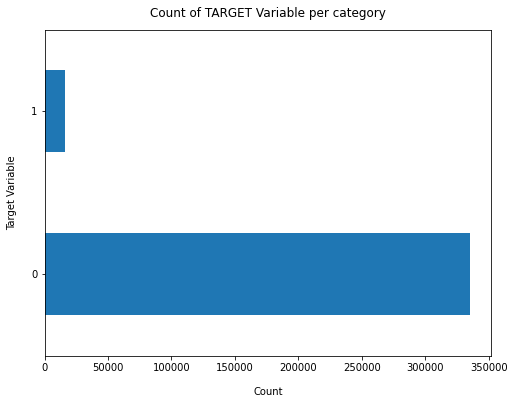

In [26]:
pandas_df['cancellation_check'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [27]:
pandas_df.describe()

actual_premium         tenure  one_yr_loss_ratio  three_yr_loss_ratio  \
count   351000.000000  351000.000000      351000.000000        351000.000000   
mean       122.718060      19.258678           0.482671             0.661342   
std         87.579953      13.519204           2.392993             3.371648   
min          1.000000       0.000000           0.000000             0.000000   
25%         60.000000       8.000000           0.000000             0.000000   
50%        100.000000      17.000000           0.000000             0.000000   
75%        167.000000      29.000000           0.000000             0.000000   
max        699.000000     244.000000         408.002728           811.822847   

         lr_increase          tp_2         psr_2  psr_2_increase_loading  \
count  351000.000000  3.484370e+05  3.484370e+05           348437.000000   
mean        0.009310  1.617353e+02  3.989062e+03                0.005549   
std         0.021073  1.691250e+02  4.120119e+05                0.005641   
min         0.000000  1.903740e-07  6.118765e-03                0.000000   
25%         0.000000  5.367032e+01  6.100125e-01                0.000000   
50%         0.000000  1.167906e+02  8.952433e-01                0.005000   
75%         0.000000  2.136377e+02  1.363658e+00                0.010000   
max         0.070000  3.611840e+04  2.416293e+08                0.020000   

       premium_increase  new_premium_2  ...   three_yr_all  one_yr_claims  \
count     351000.000000  351000.000000  ...  351000.000000  351000.000000   
mean           0.094818     134.603356  ...       0.040553      99.588422   
std            0.022347      96.406541  ...       0.434138    1330.633526   
min            0.080000       1.170000  ...       0.000000       0.000000   
25%            0.080000      66.600000  ...       0.000000       0.000000   
50%            0.085000     108.000000  ...       0.000000       0.000000   
75%            0.095000     181.440000  ...       0.000000       0.000000   
max            0.170000     768.900000  ...      18.000000  121475.104348   

       three_yr_claims  five_yr_claims      net_th_lo  net_ad_repair  \
count    351000.000000   351000.000000  351000.000000  351000.000000   
mean        115.234274      123.404121      48.446227      14.850625   
std        1592.108607     1715.389805     748.758395     307.464838   
min           0.000000        0.000000       0.000000       0.000000   
25%           0.000000        0.000000       0.000000       0.000000   
50%           0.000000        0.000000       0.000000       0.000000   
75%           0.000000        0.000000       0.000000       0.000000   
max      162521.739130   174657.965217   44972.904348   20402.608696   

       net_ad_replace  ad_loss_of_si  insured_value  cancellation_check  
count   351000.000000   3.510000e+05   3.509960e+05       351000.000000  
mean         7.797470   1.387009e+01   7.883375e+03            0.045308  
std        292.287423   5.224161e+03   6.631124e+03            0.207978  
min          0.000000   0.000000e+00   6.599987e-03            0.000000  
25%          0.000000   0.000000e+00   3.771644e+03            0.000000  
50%          0.000000   0.000000e+00   5.793972e+03            0.000000  
75%          0.000000   0.000000e+00   1.164699e+04            0.000000  
max      27043.591304   2.151880e+06   1.277814e+06            1.000000  

[8 rows x 31 columns]

In [28]:
pandas_df.describe(include=['object'])

vas_code one_yr_lr_band three_yr_lr_band            segment      lsm  \
count    351000         351000           351000             351000   324768   
unique       29              6                6                  6       11   
top       VIC01    a: 0 to 20%      a: 0 to 20%  aspiration seeker  Group 6   
freq     194909         314774           277690             142031   158658   

       policy_make_mapped       si_band tenure_group    most_used_prov  \
count              351000        350994       351000            347473   
unique                  4            11            5                 8   
top               Samsung  5000 to 7500       gt 5yr  Southern Gauteng   
freq               144123         83414       209500             84590   

       dmuc_24h_distnct_cell_site_qty peril_filter five_yr_all   map_age  
count                          349500       351000      351000    351000  
unique                              7            2           4         8  
top                             7plus         COMP           0  41 to 50  
freq                           109423       286084      249477     83965

In [29]:
# Skew Value (x)	Description of Data
# -0.5 < x < 0.5	Fairly Symmetrical
# -1 < x < -0.5	Moderate Negative Skew
# 0.5 < x < 1	Moderate Positive Skew
# x < -1	High Negative Skew
# x > 1	High Positve Skew
pandas_df.skew()

actual_premium              1.148291
tenure                      2.141449
one_yr_loss_ratio          40.055097
three_yr_loss_ratio        62.711593
lr_increase                 2.230705
tp_2                       29.211175
psr_2                     578.912411
psr_2_increase_loading      0.495646
premium_increase            2.051852
new_premium_2               1.156793
new_premium_psr           580.709192
monetary_increase           1.659346
count_th_lo                11.799521
count_ad_repair            16.527749
count_ad_replace           28.686070
count_ad                   14.281602
gross_ad_repair            28.041761
gross_ad_replace           50.681156
gross_ad                   28.497159
gross_th_lo                21.802735
one_yr_all                 13.175713
three_yr_all               14.373207
one_yr_claims              25.261849
three_yr_claims            26.959398
five_yr_claims             26.390463
net_th_lo                  21.549231
net_ad_repair              29.013335
n

In [30]:
# High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers
pandas_df.kurtosis()

actual_premium                 0.513119
tenure                        15.689718
one_yr_loss_ratio           4741.200085
three_yr_loss_ratio        10936.246019
lr_increase                    3.503781
tp_2                        5867.156512
psr_2                     339478.374662
psr_2_increase_loading        -1.090042
premium_increase               3.158439
new_premium_2                  0.556600
new_premium_psr           341715.615354
monetary_increase              3.425616
count_th_lo                  137.229474
count_ad_repair              271.168018
count_ad_replace             820.895276
count_ad                     201.965297
gross_ad_repair              972.171872
gross_ad_replace            2970.025899
gross_ad                    1041.166535
gross_th_lo                  580.855153
one_yr_all                   215.189668
three_yr_all                 259.800508
one_yr_claims               1014.547719
three_yr_claims             1188.783484
five_yr_claims              1116.790004


In [31]:
features = ['actual_premium', 'tenure', 'one_yr_loss_ratio', 'three_yr_loss_ratio',
       'lr_increase', 'tp_2', 'psr_2', 'psr_2_increase_loading',
       'premium_increase', 'new_premium_2', 'new_premium_psr',
       'monetary_increase', 'cancellation_check', 'count_th_lo',
       'count_ad_repair', 'count_ad_replace', 'insured_value', 'count_ad',
       'gross_ad_repair', 'gross_ad_replace', 'gross_th_lo', 'gross_ad',
       'one_yr_all', 'three_yr_all', 'one_yr_claims', 'three_yr_claims', 'five_yr_claims',
       'net_th_lo', 'net_ad_repair', 'net_ad_replace', 'ad_loss_of_si']

In [32]:
features1 = ['tenure']

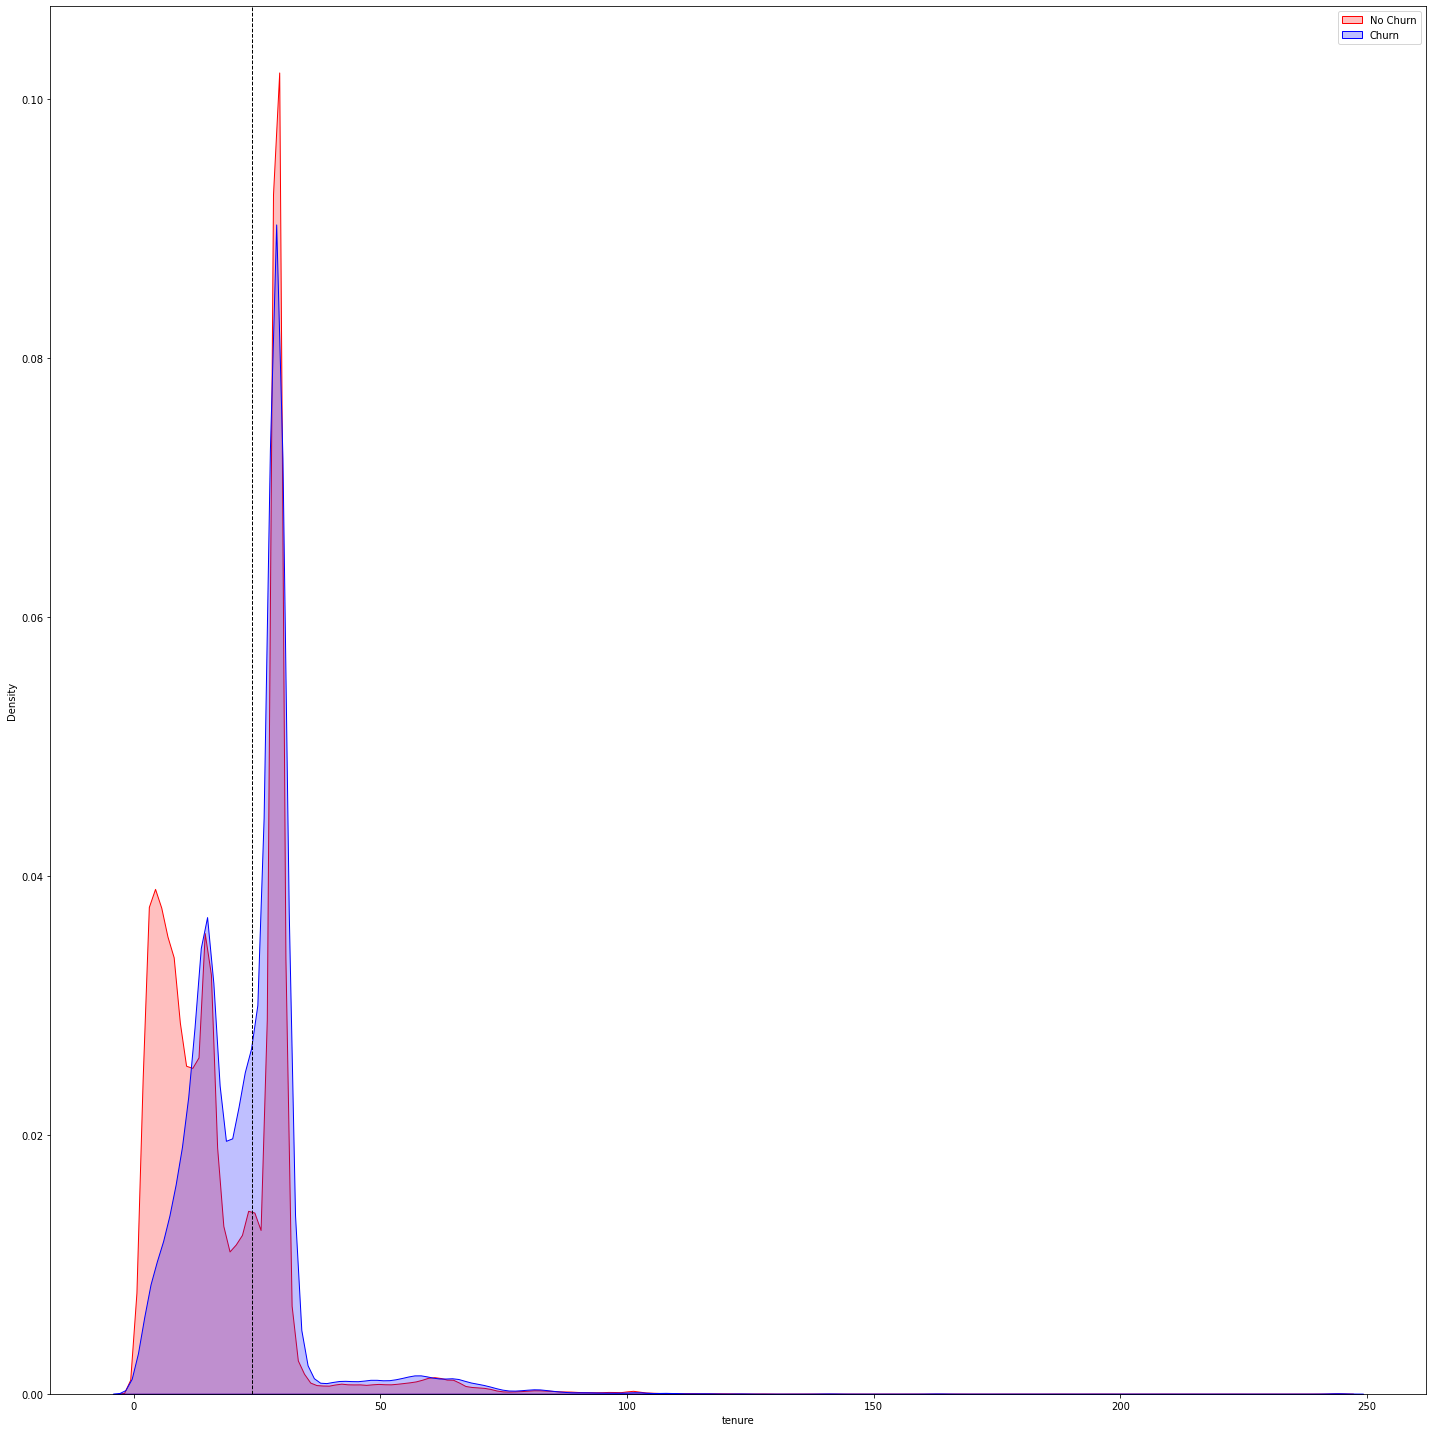

In [33]:
f, axes = plt.subplots(1, 1,  figsize=(20, 20))  
y = 0;
for name in features1:
    Mth = sns.kdeplot(x = pandas_df[name][(pandas_df["cancellation_check"] == 0) ],ax=axes, color="Red", shade = True)
    Mth = sns.kdeplot(x = pandas_df[name][(pandas_df["cancellation_check"] == 1) ], ax=axes, color="Blue", shade= True)
    Mth.legend(["No Churn","Churn"],loc='upper right')
    y = y + 1
plt.axvline(24, color='k', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.show()

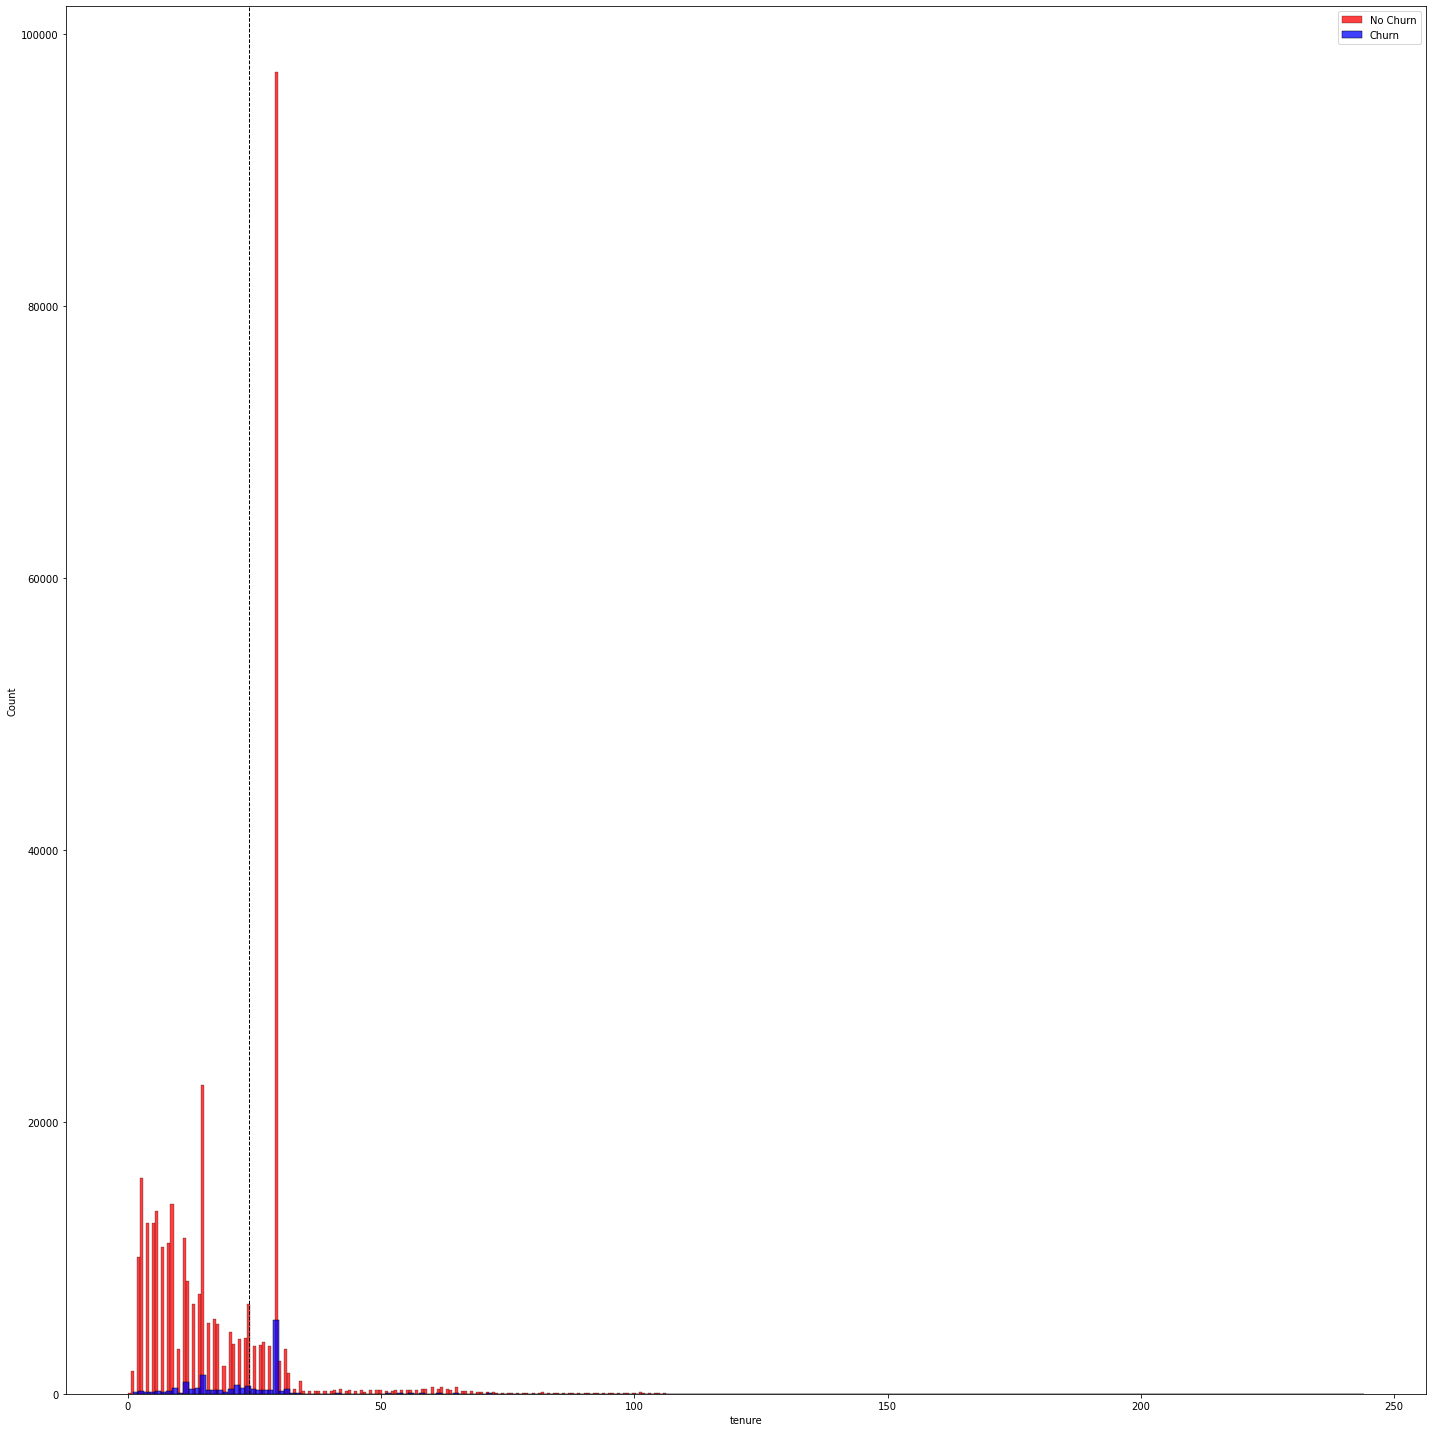

In [34]:
f, axes = plt.subplots(1, 1,  figsize=(20, 20))  
y = 0;
for name in features1:
    Mth = sns.histplot(x = pandas_df[name][(pandas_df["cancellation_check"] == 0) ],ax=axes, color="Red")
    Mth = sns.histplot(x = pandas_df[name][(pandas_df["cancellation_check"] == 1) ], ax=axes, color="Blue")
    Mth.legend(["No Churn","Churn"],loc='upper right')
    y = y + 1
plt.axvline(24, color='k', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.show()

In [35]:
pandas_df['tenure'].mode()

0    29
dtype: int32

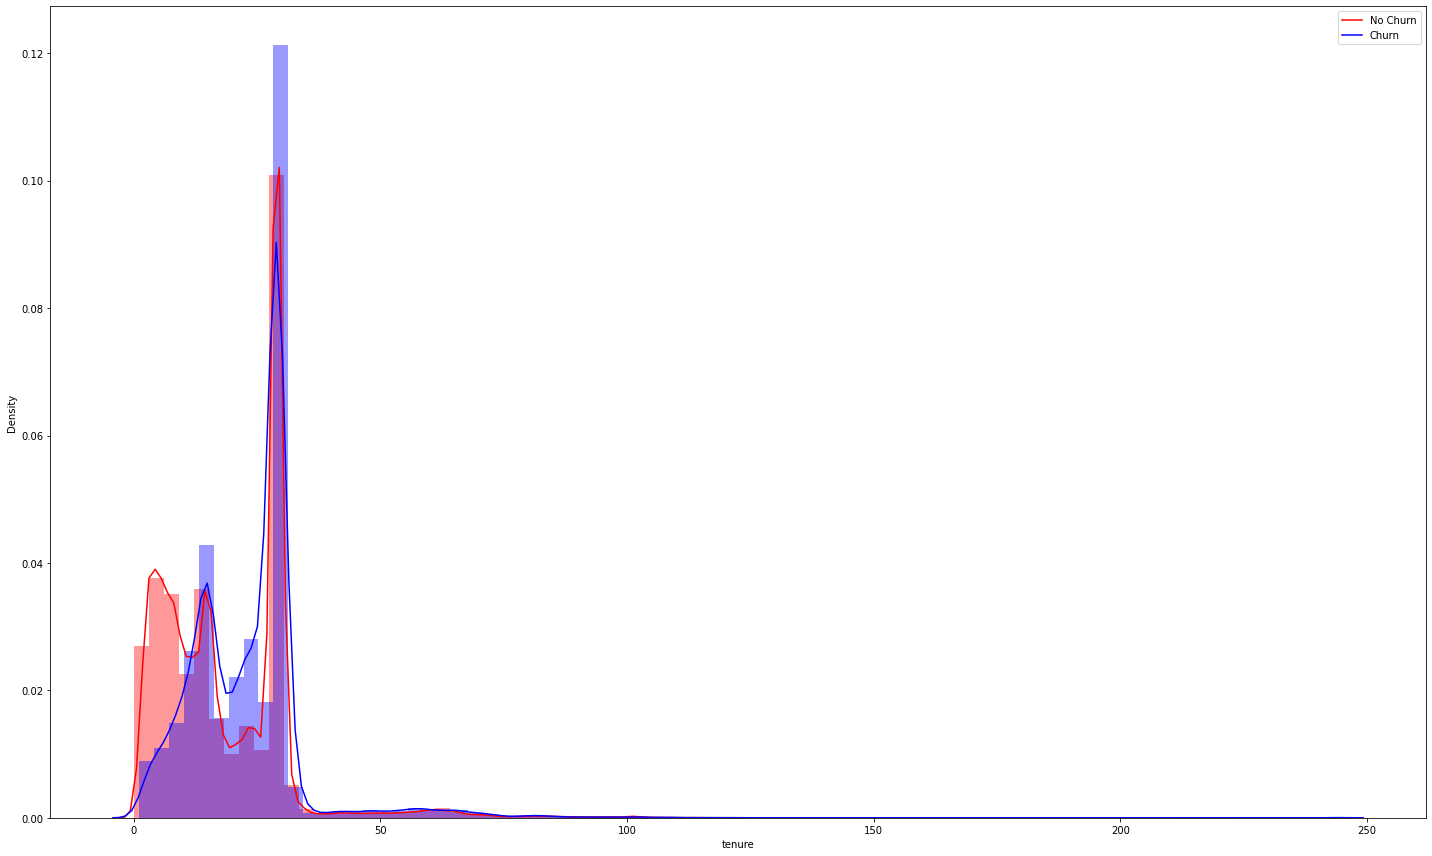

In [36]:
f, axes = plt.subplots(1, 1,  figsize=(20, 12))
for name in features1:
    zeros = pandas_df[name][(pandas_df["cancellation_check"] == 0)]
    ones = pandas_df[name][(pandas_df["cancellation_check"] == 1) ]
    Mth = sns.distplot(zeros, kde=True, bins=80, hist=True,ax=axes, color="Red")
    Mth = sns.distplot(ones, kde=True, bins=80, hist=True,ax=axes, color="Blue")
    Mth.legend(["No Churn","Churn"],loc='upper right')
plt.tight_layout()
plt.show()

In [37]:
def bins_calc(a ,b, ini, final, spaces):
    def function_hist(a, ini, final, spaces):

        # 12 bins
        bins = np.linspace(ini, final, spaces +1)
        weightsa = np.ones_like(a)/float(len(a))
        hist = np.histogram(np.array(a), bins)
        return hist

    bins = function_hist(a, ini, final, spaces)[1]
    tot = function_hist(a, ini, final, spaces)[0]
    churned = function_hist(b, ini, final, spaces)[0]
    list_of_tuples = list(zip(bins, tot, churned))
    df = pd.DataFrame(list_of_tuples,
                      columns=['bins', 'tot', 'churned'])
    return df
a = pandas_df['tenure']
b = pandas_df[pandas_df['cancellation_check'] == 1]['tenure']
df = bins_calc(a, b, 0, 36, 12)
df['churn_rate'] = df['churned']/df['tot']

In [38]:
#df.set_index("bins", inplace=True)

In [39]:
df

bins     tot  churned  churn_rate
0    0.0   11835       99    0.008365
1    3.0   41495      478    0.011519
2    6.0   35894      591    0.016465
3    9.0   29676      973    0.032787
4   12.0   23397     1203    0.051417
5   15.0   35398     1978    0.055879
6   18.0   12594      832    0.066063
7   21.0   12813     1077    0.084055
8   24.0   15032     1271    0.084553
9   27.0  110452     6009    0.054404
10  30.0    7830      541    0.069093
11  33.0    1907      137    0.071841

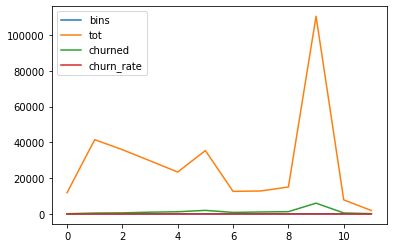

In [40]:
df.plot()

plt.show()

<AxesSubplot:>

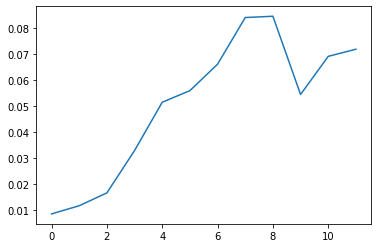

In [41]:
df['churn_rate'].plot()

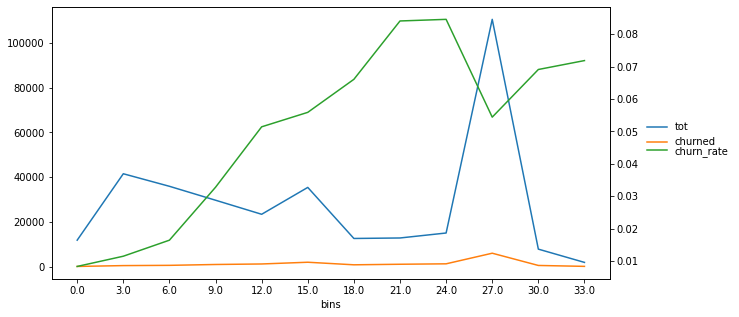

In [42]:
ax = df.plot(x='bins', y=['tot','churned','churn_rate'], secondary_y='churn_rate', figsize=(10, 5))
xticks = df['bins']
x = df['bins']
plt.xticks(x,xticks)
# move the legend for each y axis
ax.legend(bbox_to_anchor=(1.05, 0.53), loc='center left', frameon=False)
ax.right_ax.legend(bbox_to_anchor=(1.05, 0.47), loc='center left', frameon=False)

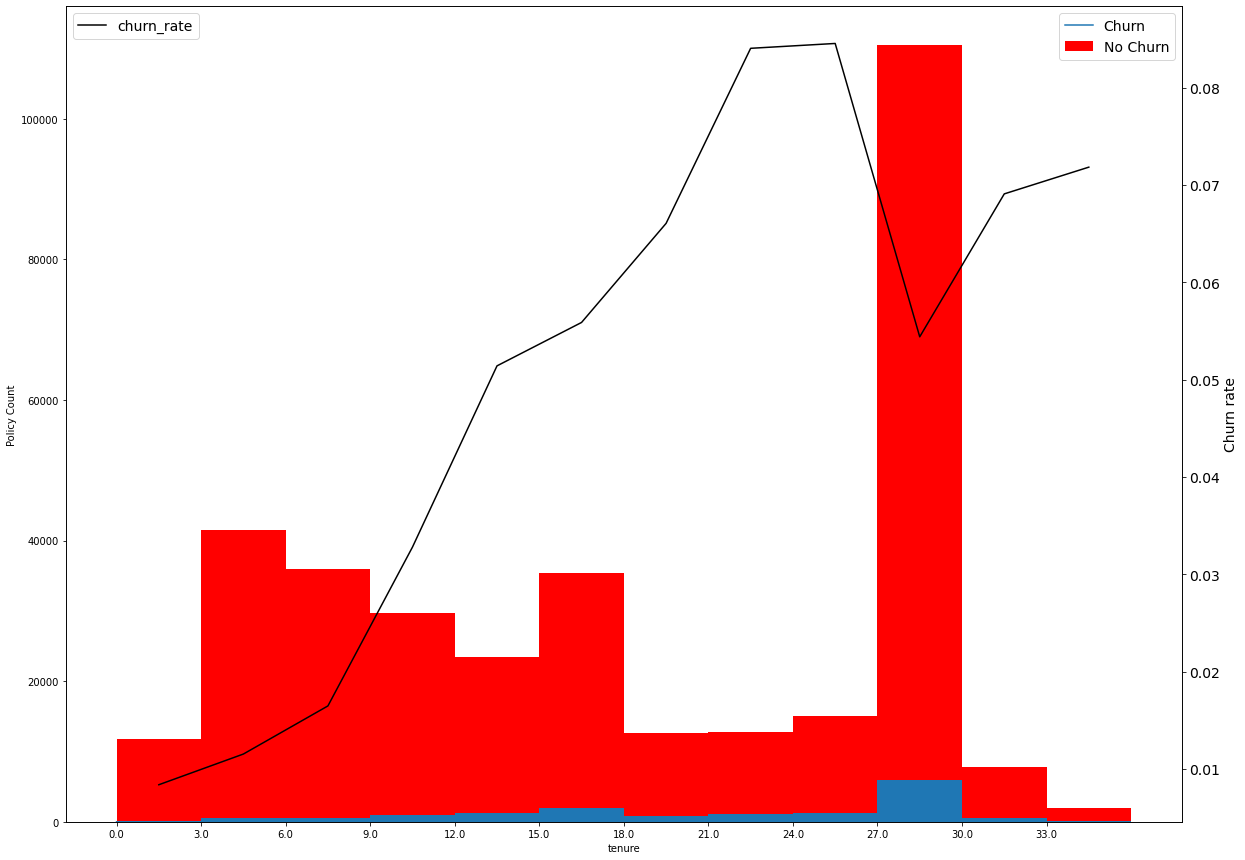

In [43]:
plt.figure(figsize=(20, 15))  # width:20, height:3
plt.bar(df['bins'], df['tot'], align='edge', width=3,color="Red")
plt.bar(df['bins'], df['churned'], align='edge', width=3)
plt.plot(df['bins'], df['churn_rate'] )
x = df['bins']
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.xticks(x,xticks)
plt.legend(["Churn","No Churn",],loc='upper right')
plt.ylabel('Policy Count') 
plt.xlabel('tenure')
axes2 = plt.twinx()
axes2.plot(x +1.5, df['churn_rate'], color='k', label='churn_rate')
axes2.set_ylabel('Churn rate')
axes2.legend(['churn_rate'],  loc='upper left')


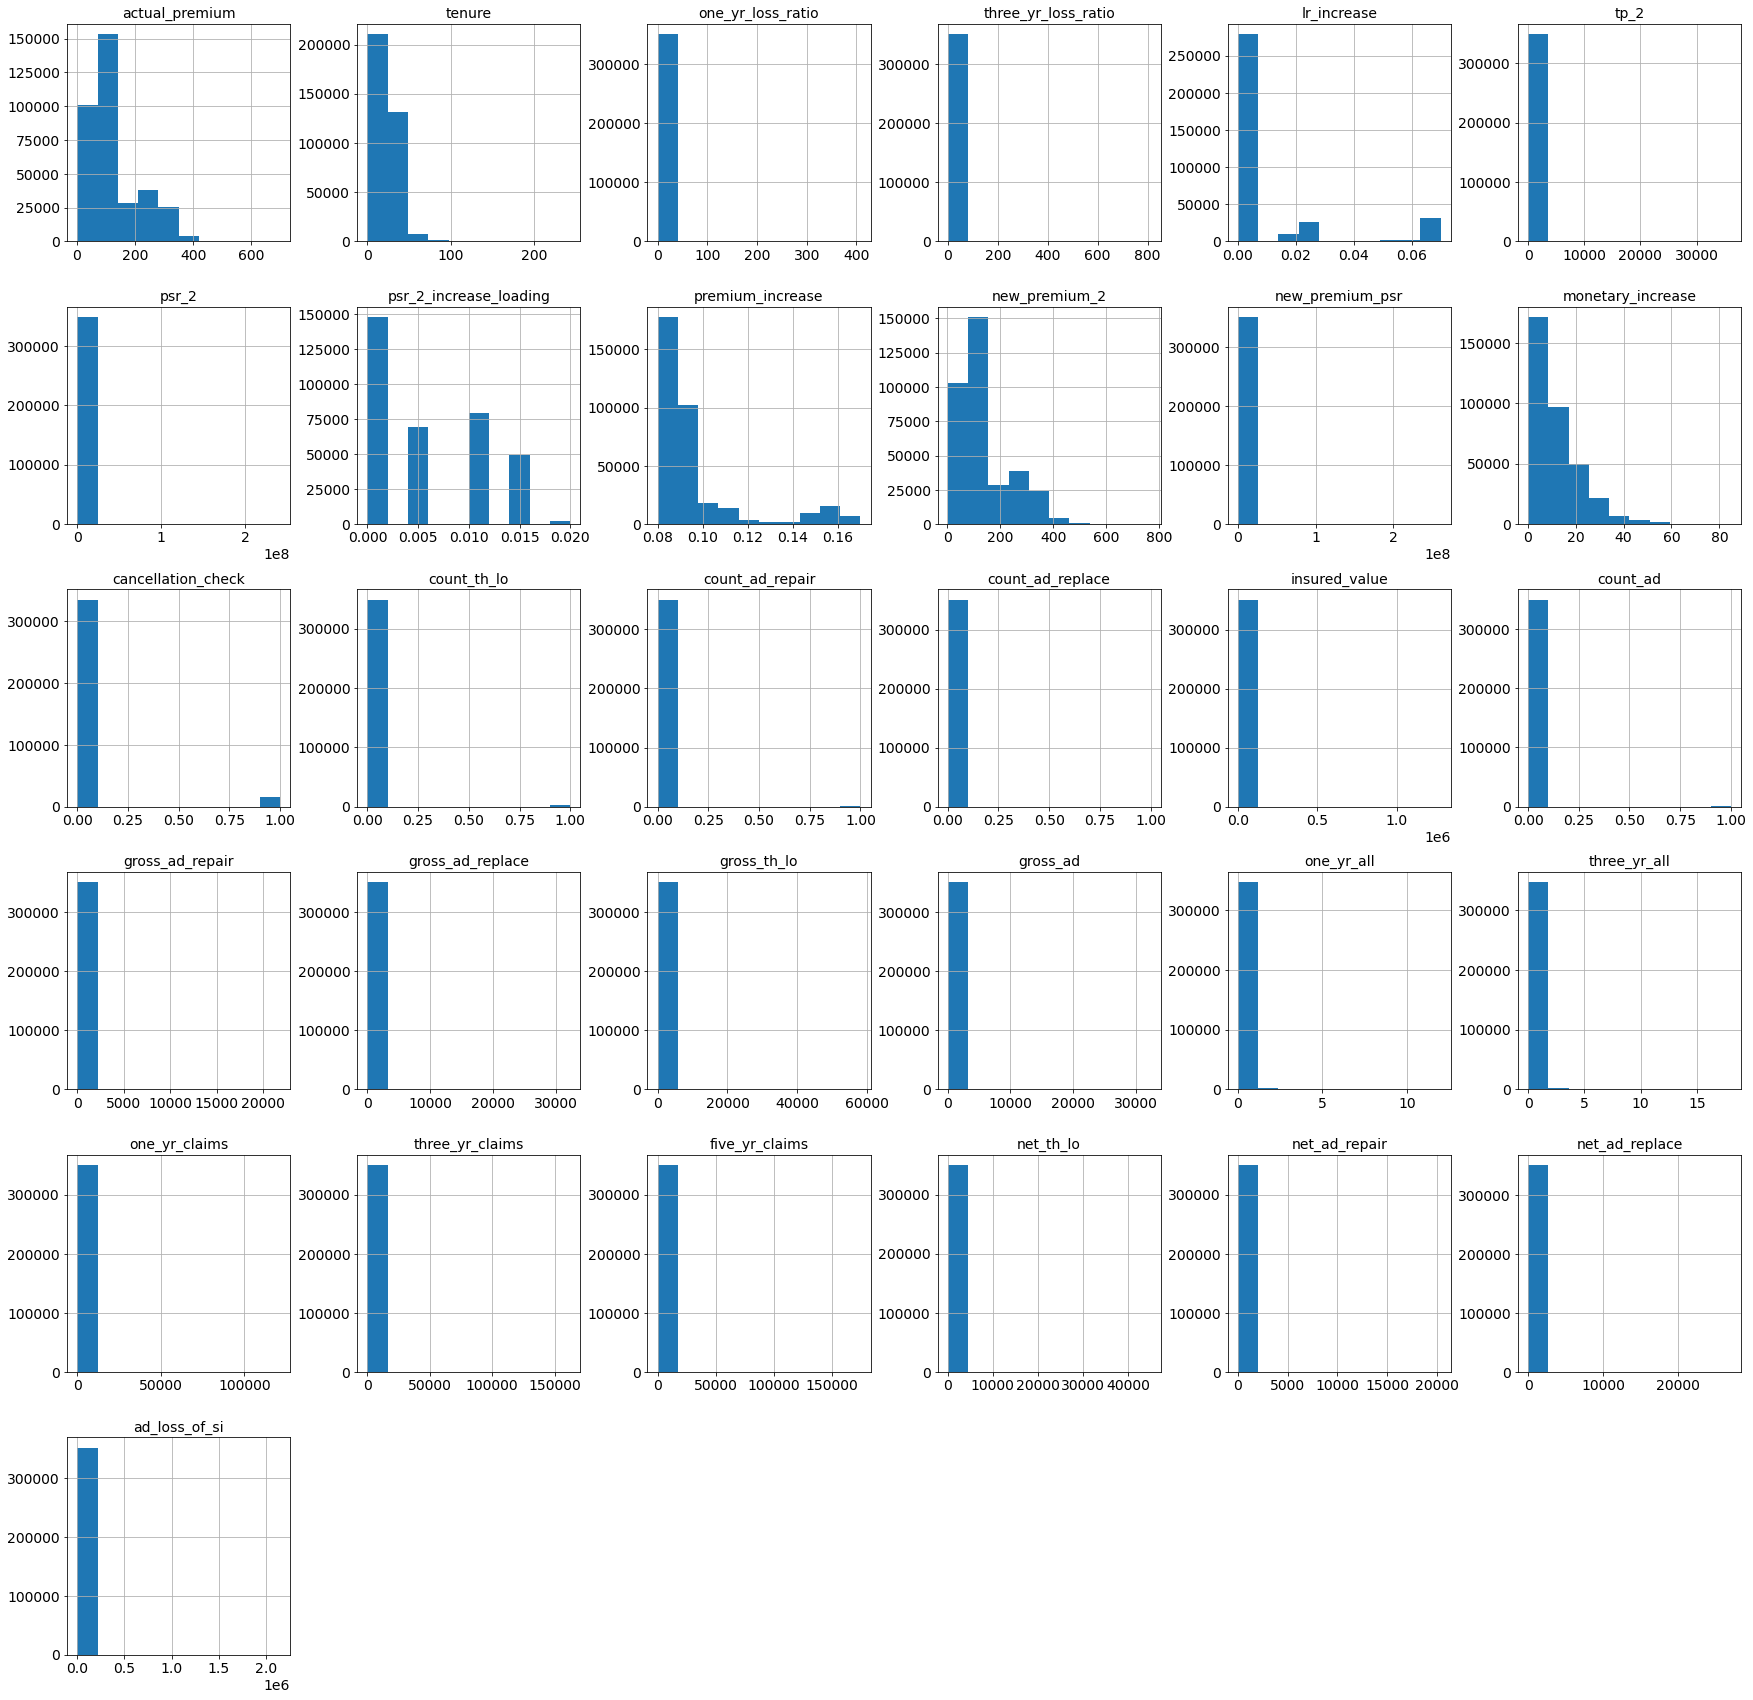

In [44]:
#features = cols = pandas_df.select_dtypes([np.number]).columns # create a list of all numerical features

pandas_df[features].hist(figsize=(30,30));

<AxesSubplot:>

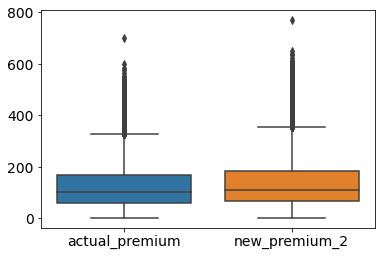

In [45]:
sns.boxplot(data=pandas_df[["actual_premium", "new_premium_2"]])

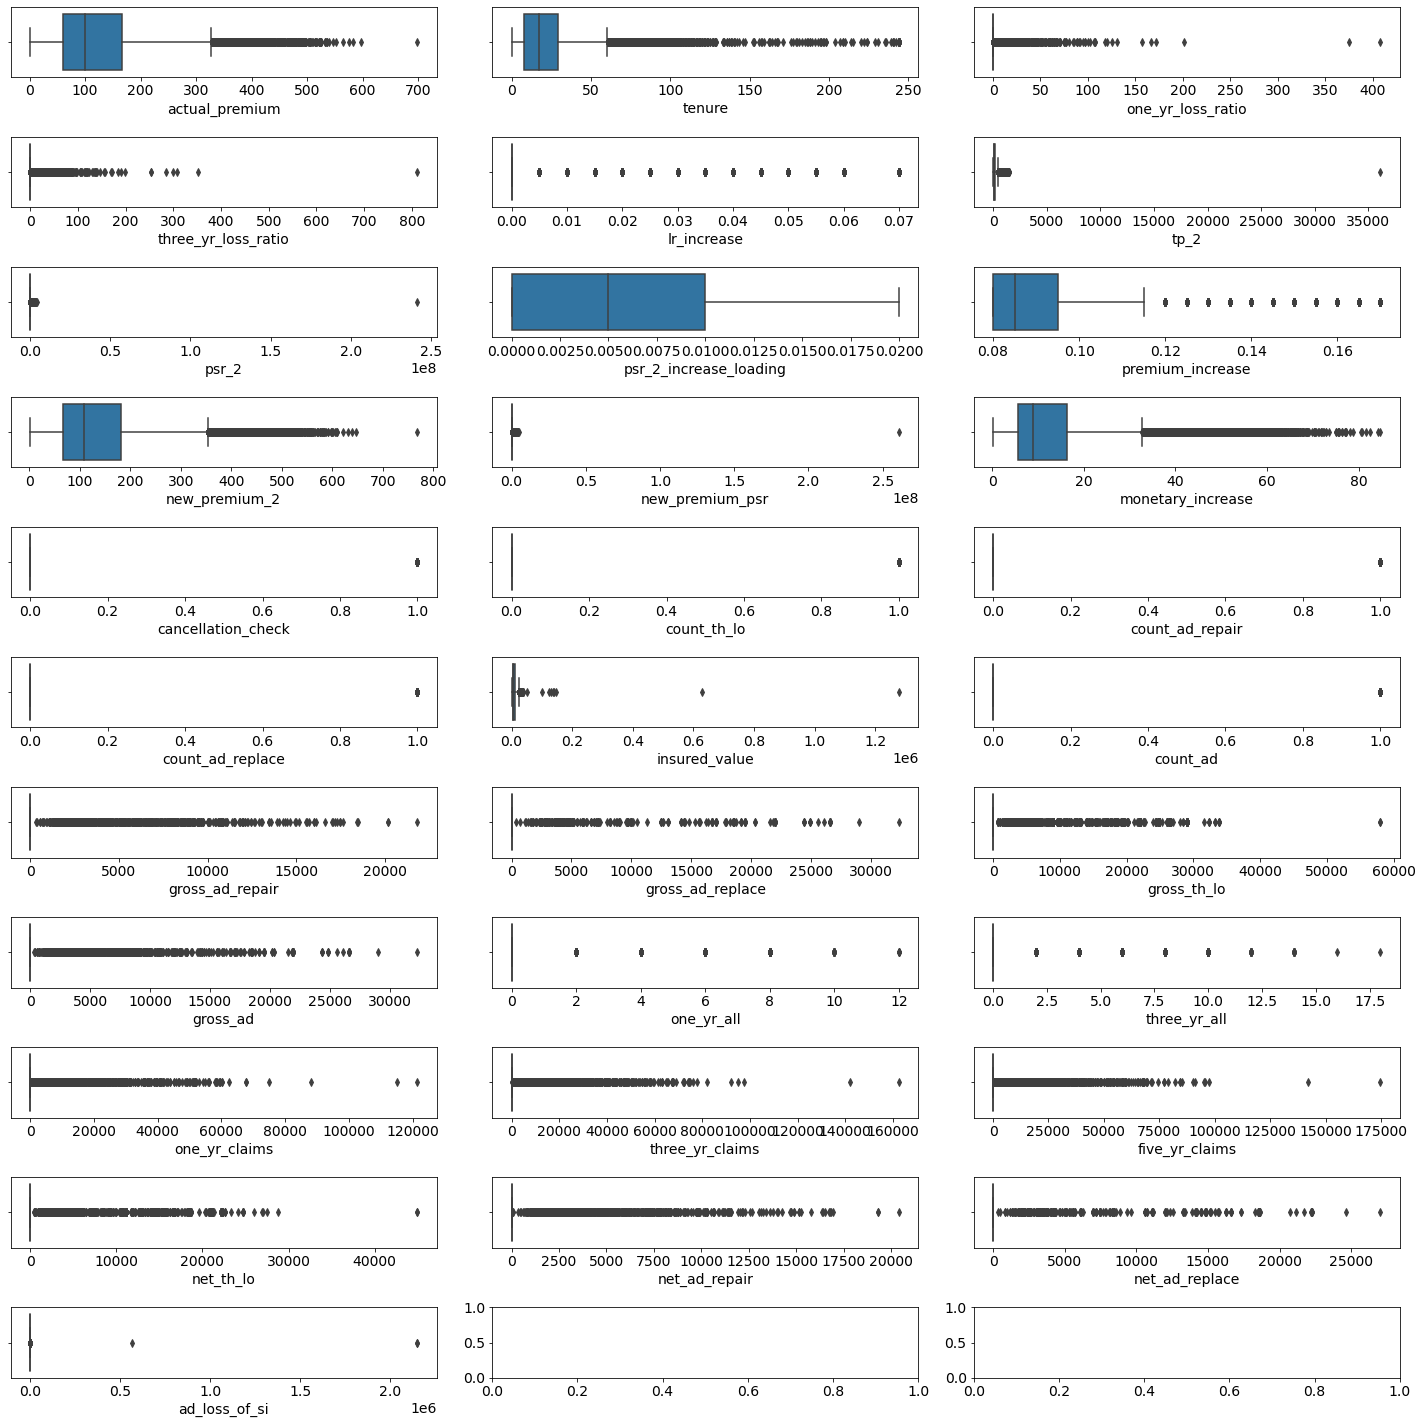

In [46]:
f, axes = plt.subplots(round(len(features)/3) + 1, 3,  figsize=(20, 20))  
y = 0;
for name in features:
    i, j = divmod(y, 3)
    sns.boxplot(x=pandas_df[name], ax=axes[i, j])
    y = y + 1

plt.tight_layout()
plt.show()

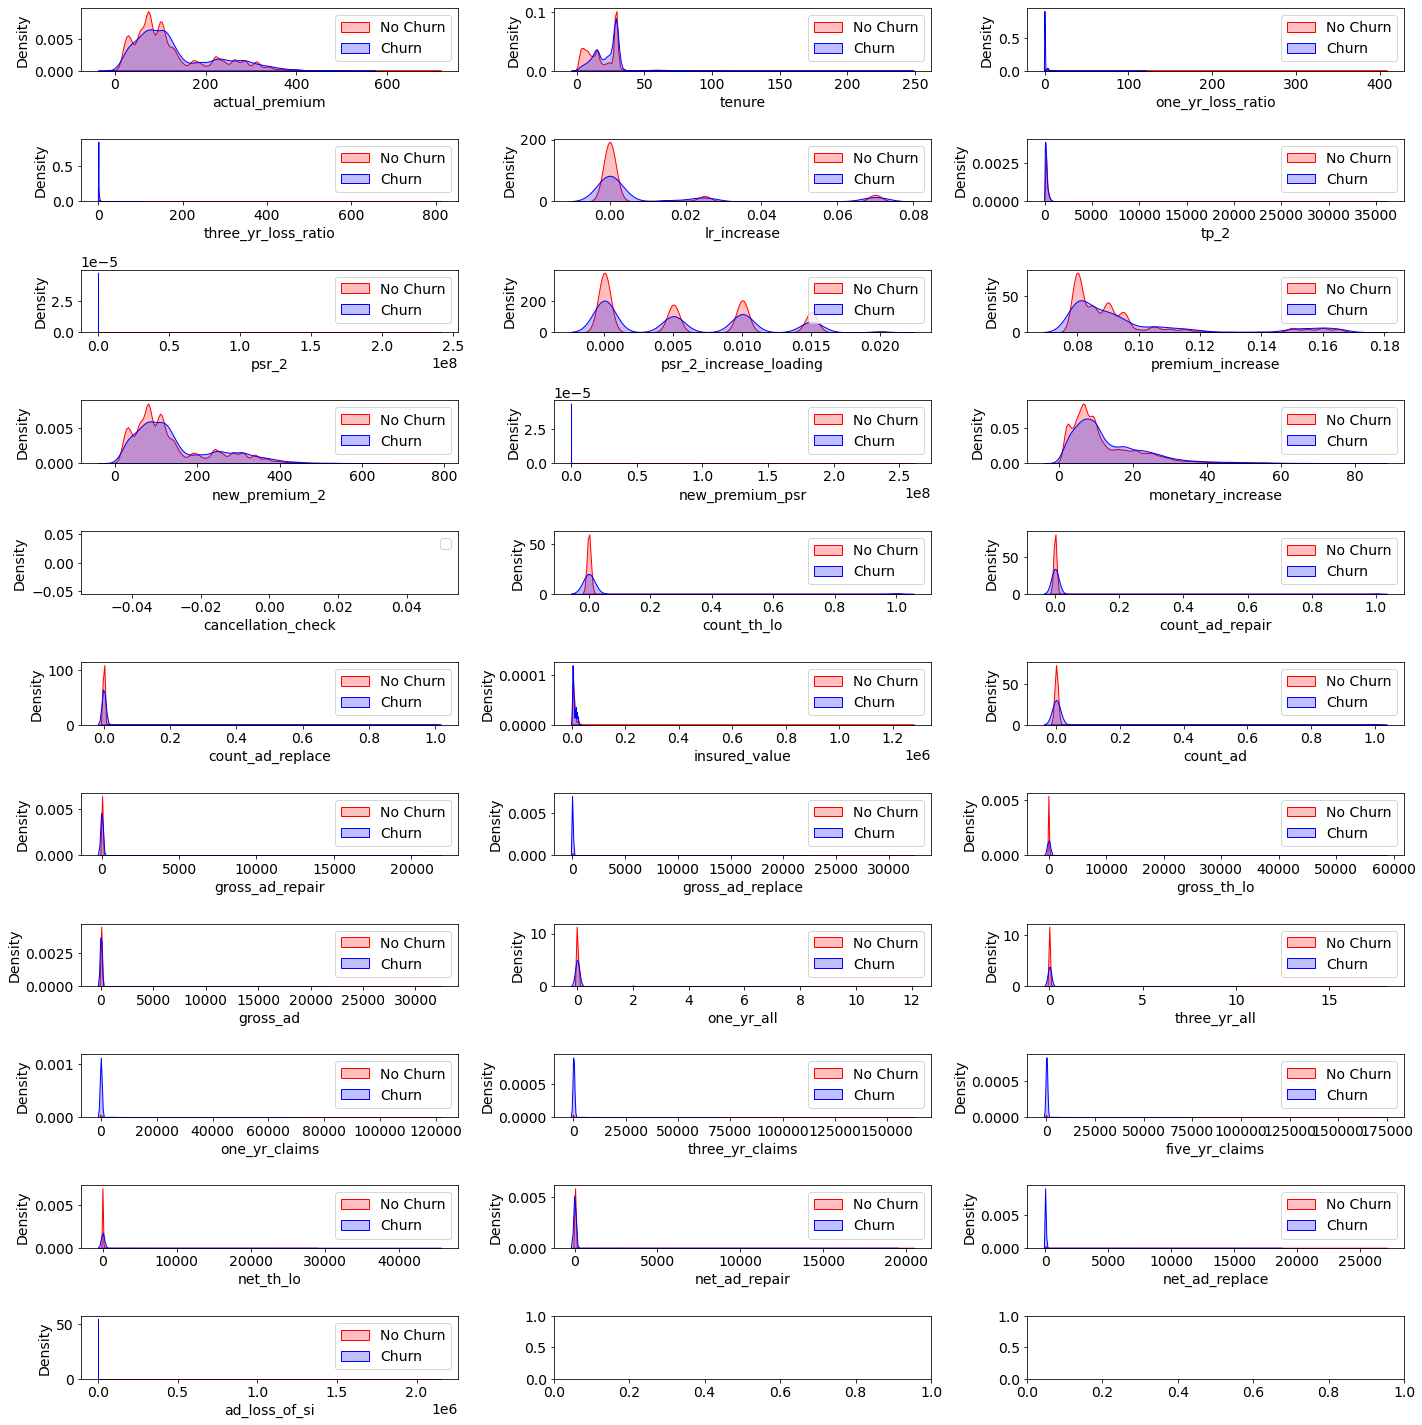

In [47]:
f, axes = plt.subplots(round(len(features)/3) + 1, 3,  figsize=(20, 20))  
y = 0;
for name in features:
    i, j = divmod(y, 3)
    #sns.boxplot(x=pandas_df[name], ax=axes[i, j])
    Mth = sns.kdeplot(x = pandas_df[name][(pandas_df["cancellation_check"] == 0) ],ax=axes[i, j], color="Red", shade = True)
    Mth = sns.kdeplot(x = pandas_df[name][(pandas_df["cancellation_check"] == 1) ], ax=axes[i, j], color="Blue", shade= True)
    Mth.legend(["No Churn","Churn"],loc='upper right')
    y = y + 1

plt.tight_layout()
plt.show()

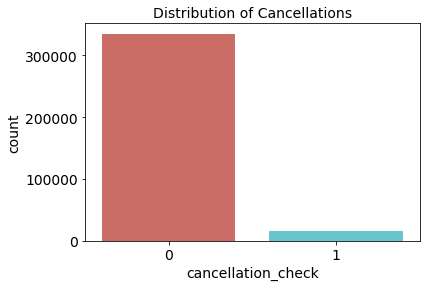

In [48]:
#Bar plot
sns.countplot(x = 'cancellation_check', data = pandas_df, palette="hls")
plt.title("Distribution of Cancellations");

In [49]:
objects = [ 'vas_code', 'one_yr_lr_band','three_yr_lr_band', 'segment', 'lsm', 'policy_make_mapped', \
           'si_band', 'tenure_group', 'most_used_prov', 
           'dmuc_24h_distnct_cell_site_qty', 'five_yr_all', 'peril_filter']

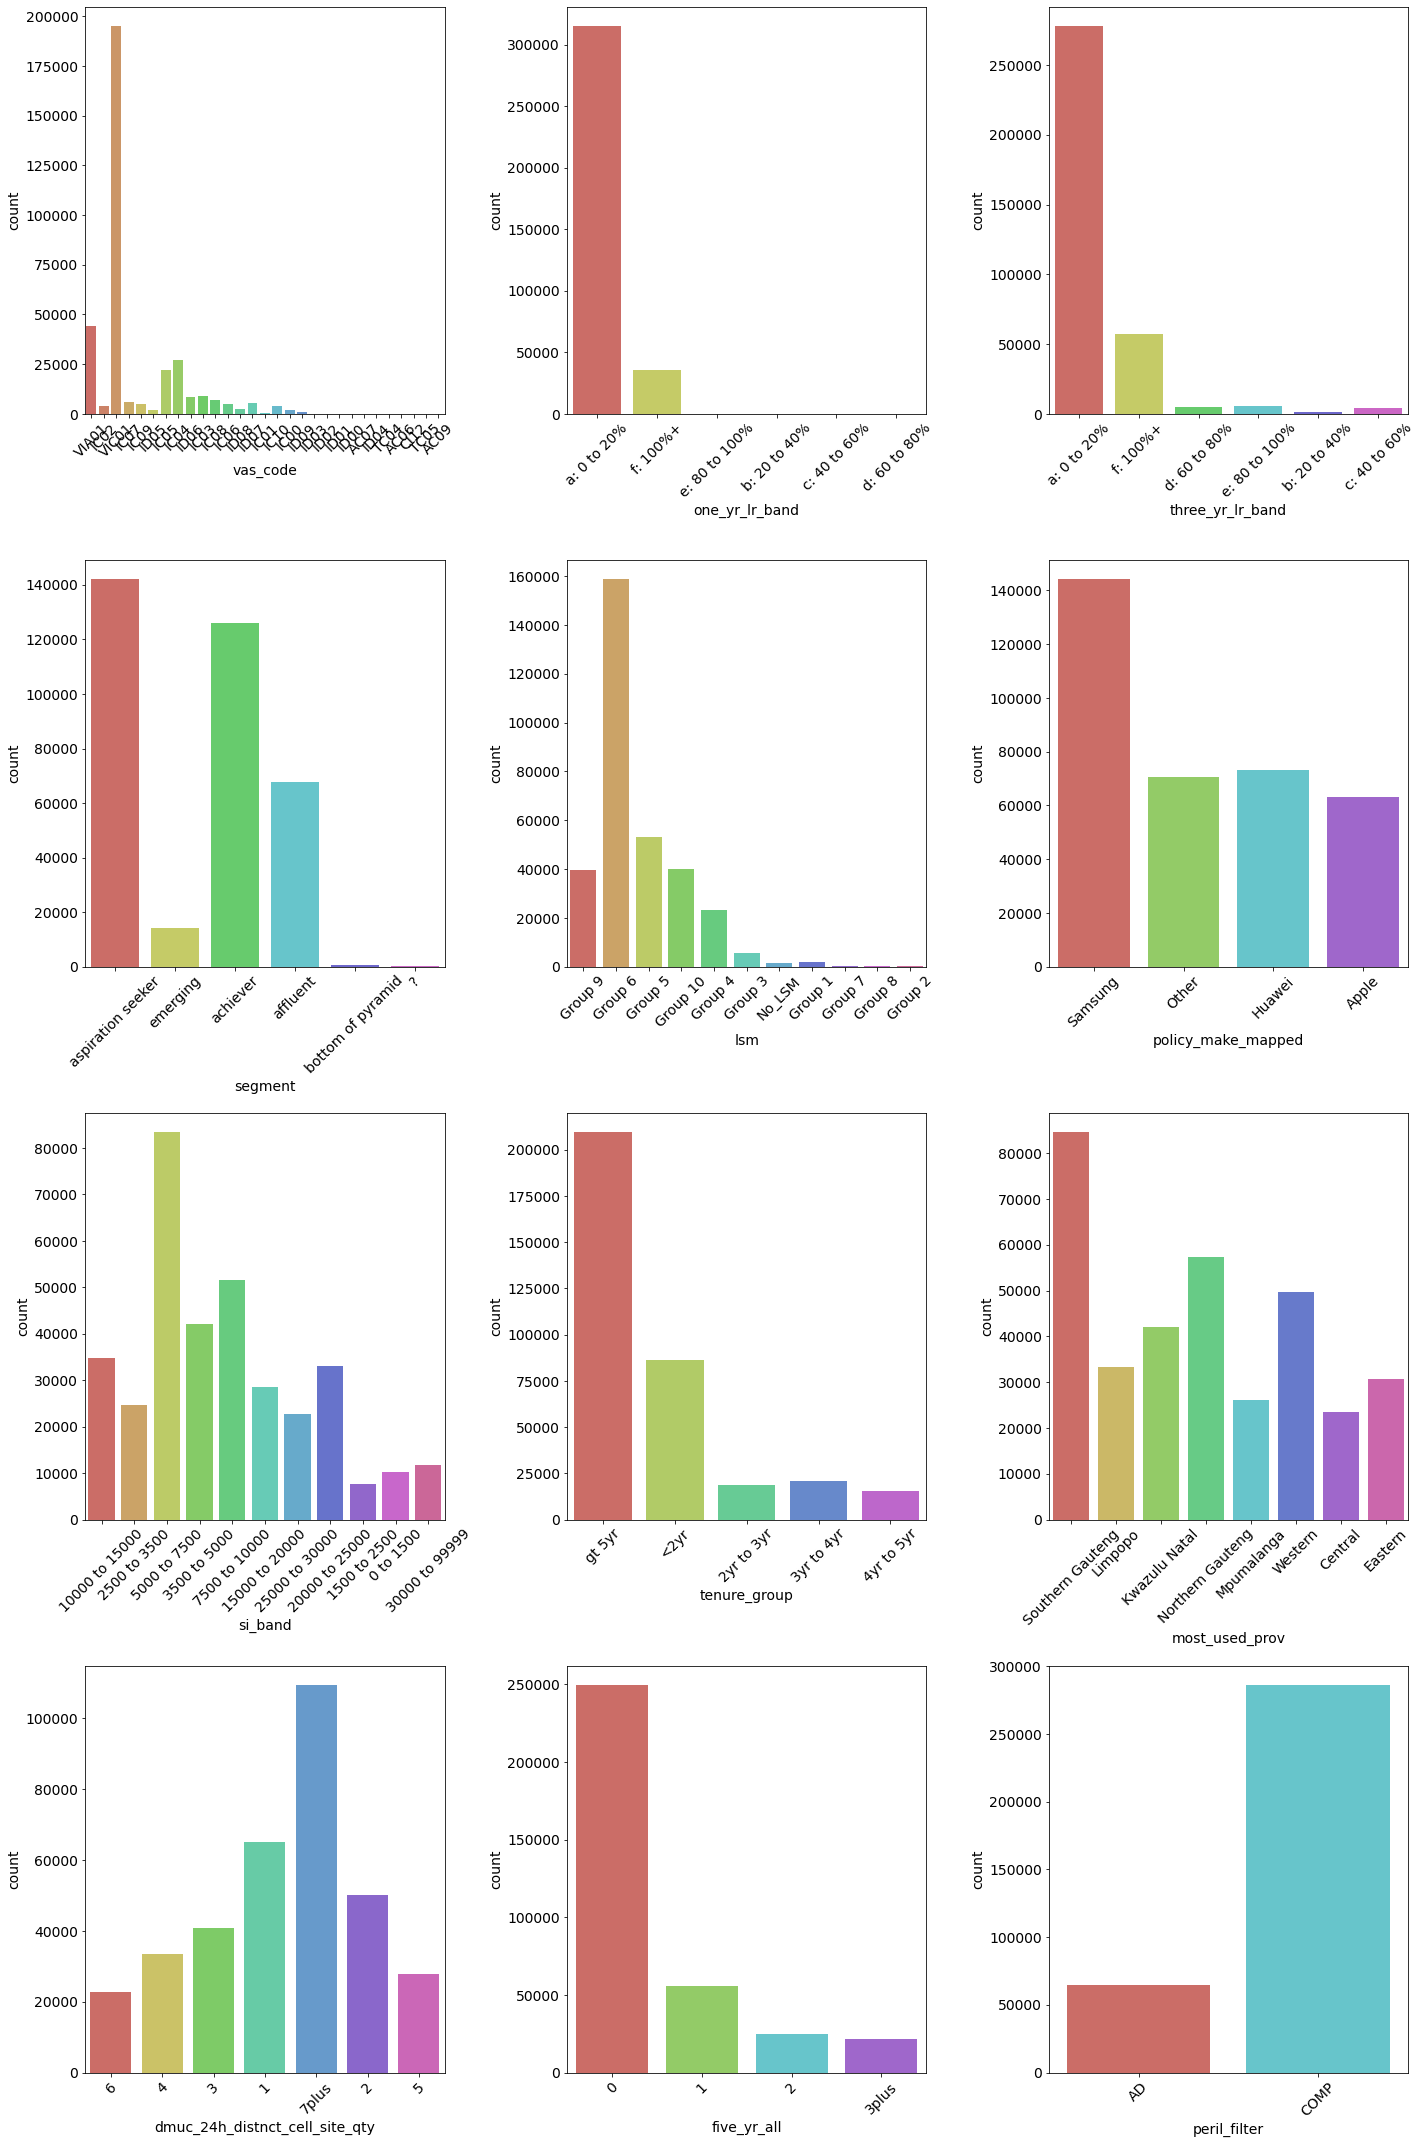

In [50]:
f, axes = plt.subplots(round(len(objects)/3), 3,  figsize=(20, 30))  
y = 0
for name in objects:
    i, j = divmod(y, 3)
    ax = sns.countplot(x = pandas_df[name], ax=axes[i, j], palette="hls")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    y = y + 1
plt.tight_layout()
plt.show()

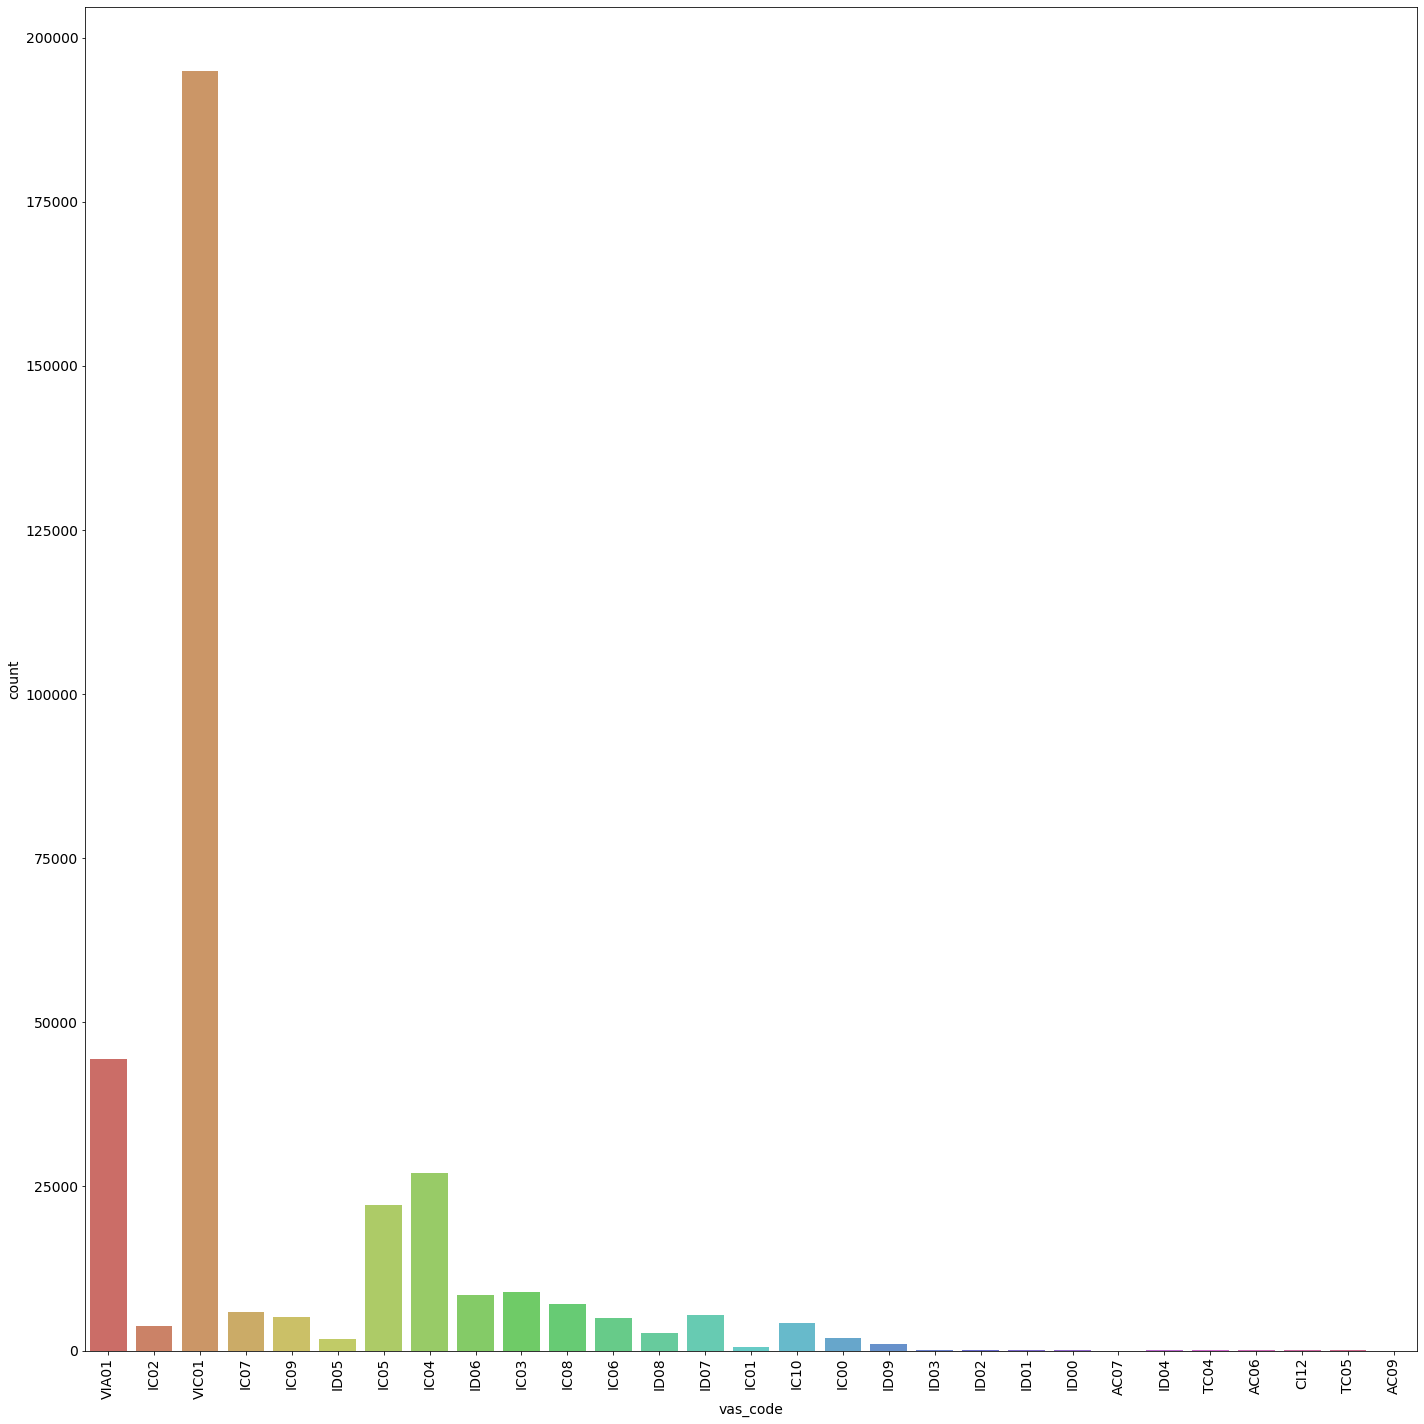

In [51]:
f, axes = plt.subplots(1,1,  figsize=(20, 20))  
y = 0;
vis_objects = ['vas_code']
for name in vis_objects:
    ax = sns.countplot(x = pandas_df[name], ax=axes, palette="hls")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    y = y + 1

plt.tight_layout()
plt.show()

In [52]:
colors = ['#00A5E0', '#DD403A']
df_churned = pandas_df[pandas_df['cancellation_check'] == 1]
df_retained = pandas_df[pandas_df['cancellation_check'] == 0]

In [53]:
def plot_continuous(feature):
    '''Plot a histogram and boxplot for the churned and retained distributions for the specified feature.'''
    df_func = pandas_df.copy()
    df_func['cancellation_check'] = df_func['cancellation_check'].astype('category')
 
    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})
 
    for df, color, label in zip([df_retained, df_churned], colors, ['Retained', 'Churned']):
        sns.histplot(data=df,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()
 
    sns.boxplot(x=feature, y='cancellation_check', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Retained', 'Churned'])
 
    plt.tight_layout();

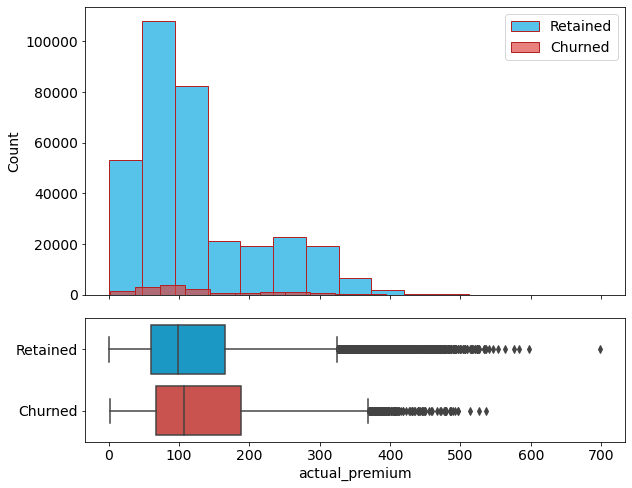

In [54]:
plot_continuous('actual_premium')

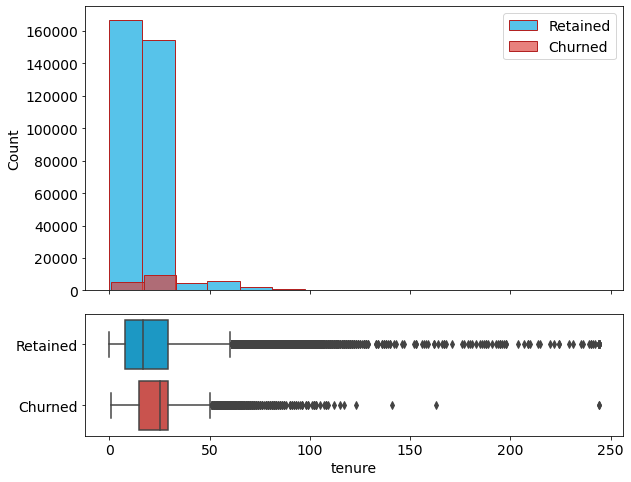

In [55]:
plot_continuous('tenure')

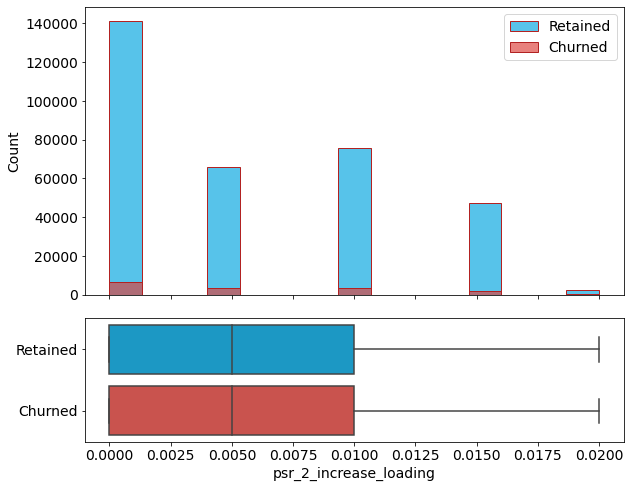

In [56]:
plot_continuous('psr_2_increase_loading')

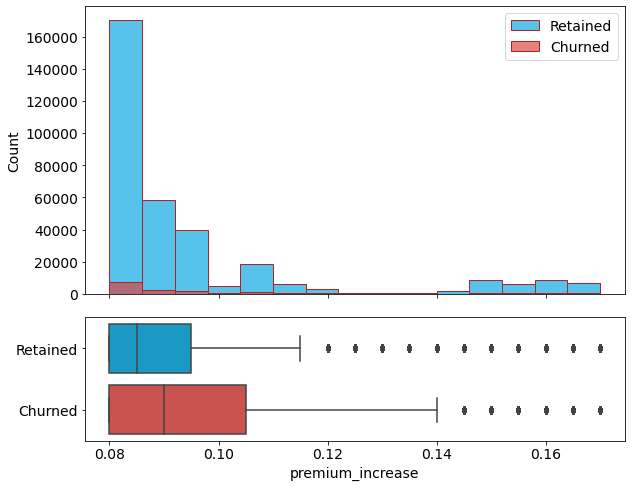

In [57]:
plot_continuous('premium_increase')

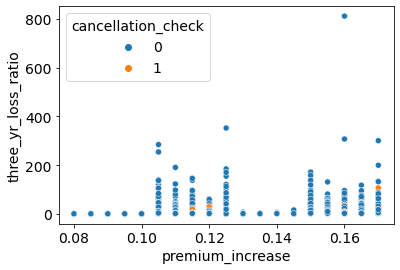

In [60]:
sns.scatterplot(x='premium_increase',y='three_yr_loss_ratio',hue='cancellation_check', data=pandas_df);

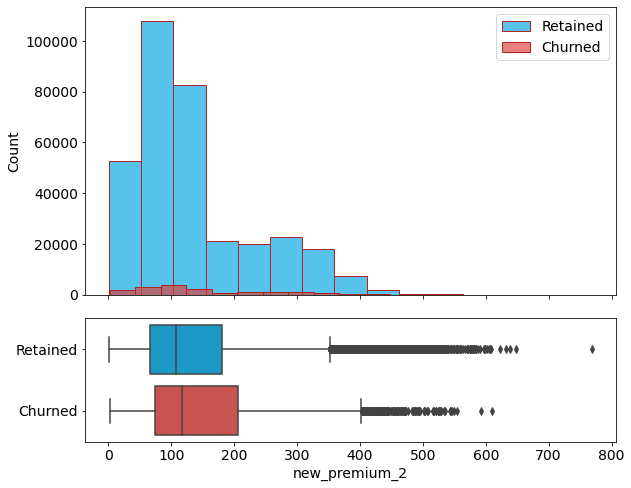

In [61]:
plot_continuous('new_premium_2')

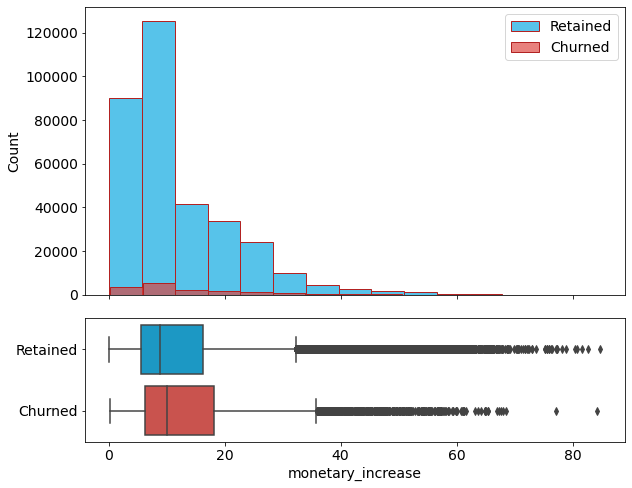

In [62]:
plot_continuous('monetary_increase')

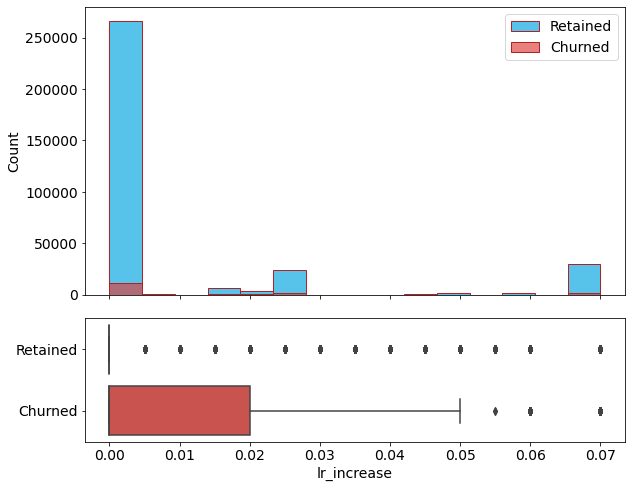

In [63]:
plot_continuous('lr_increase')

In [64]:
def srt_dist(df=pandas_df,cols=objects):
    fig, axes = plt.subplots(6, 2,squeeze=True)
    axes = axes.flatten()

    for i, j in zip(cols, axes):

        (df[i].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%',figsize =(10,37), fontsize =9,ax=j )                                                                      
        j.yaxis.label.set_size(13)

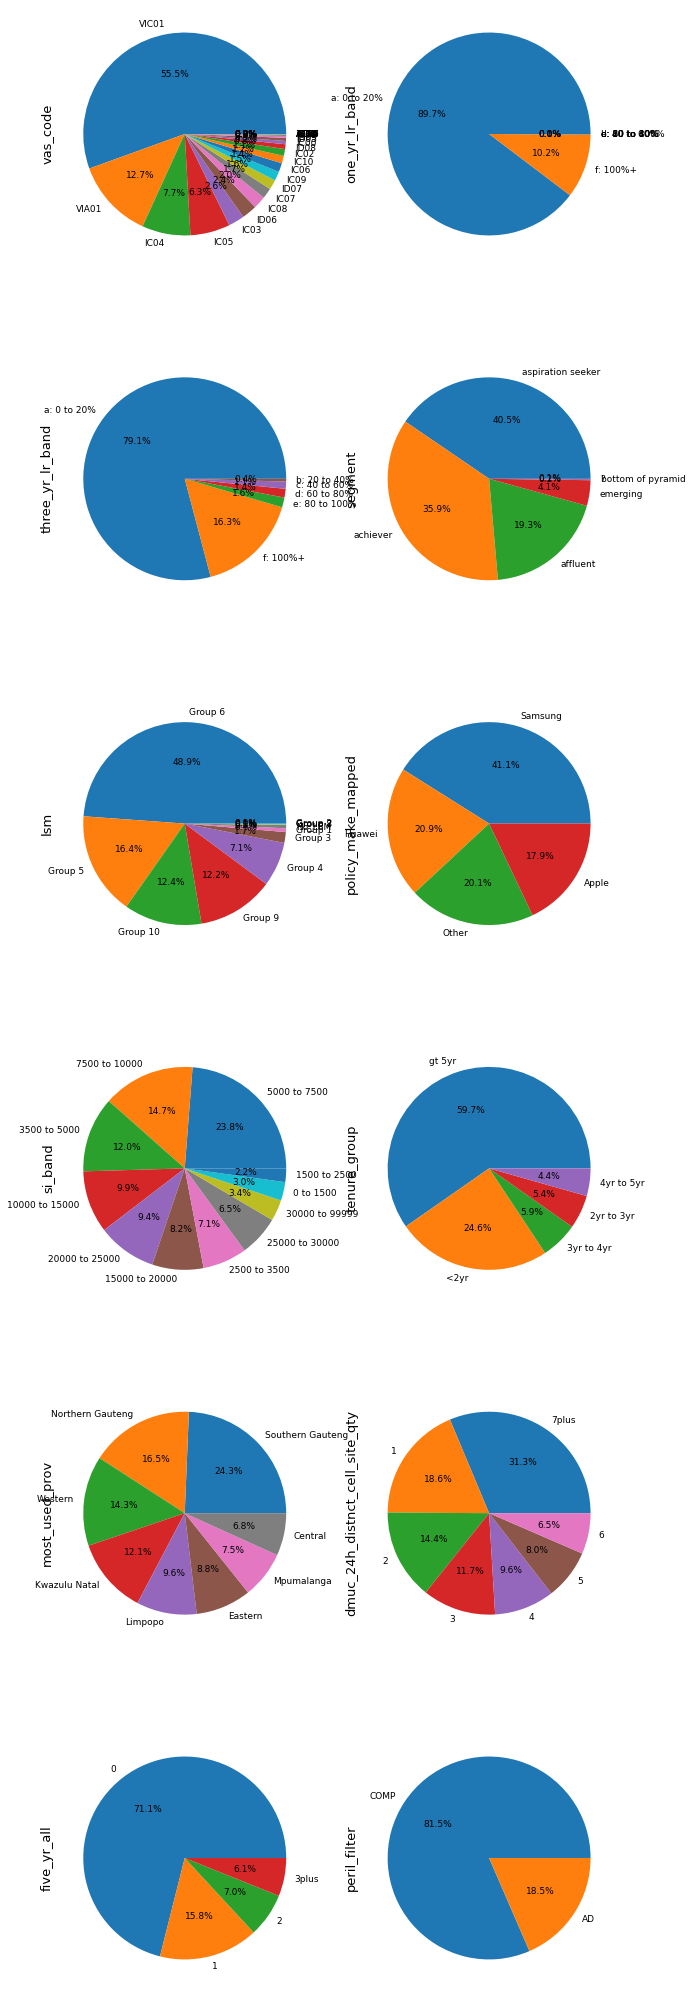

In [65]:
srt_dist()

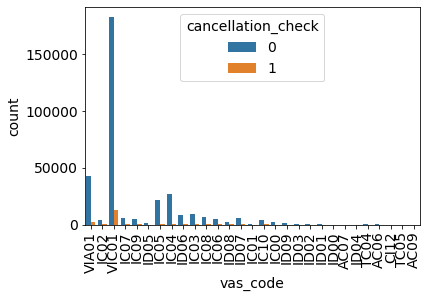

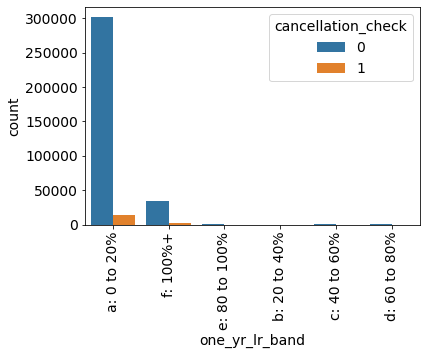

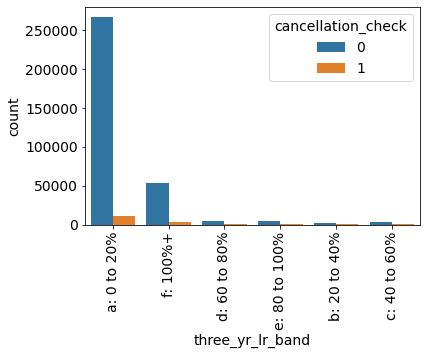

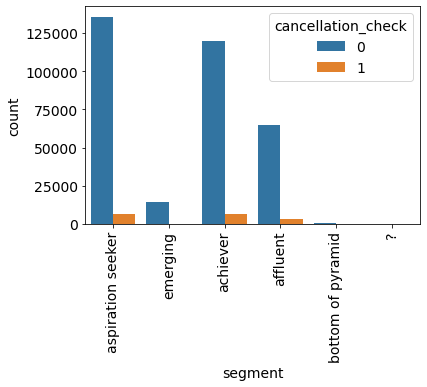

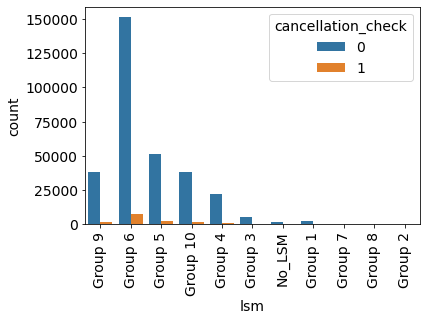

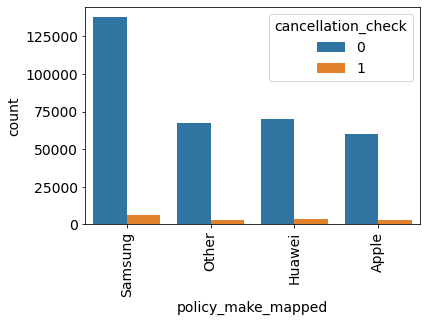

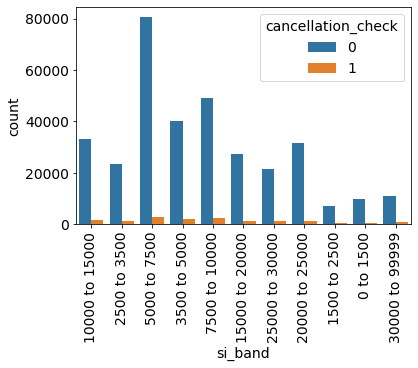

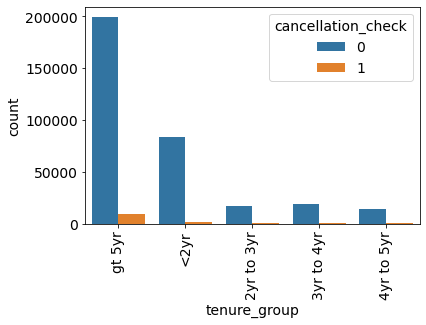

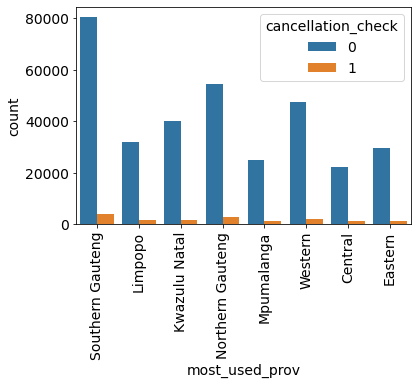

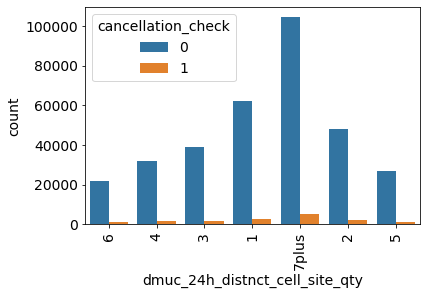

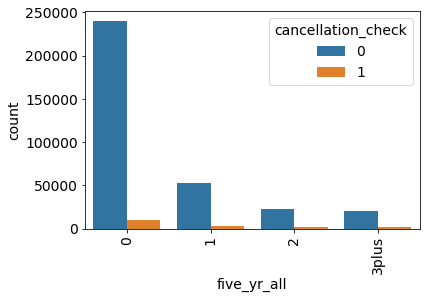

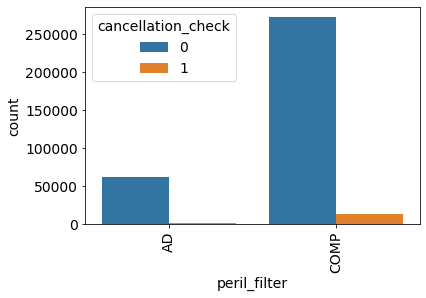

In [66]:
for i, predictor in enumerate(pandas_df[objects]):
    plt.figure(i)
    ax = sns.countplot(data=pandas_df, x=predictor, hue='cancellation_check')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    #cancellation rates

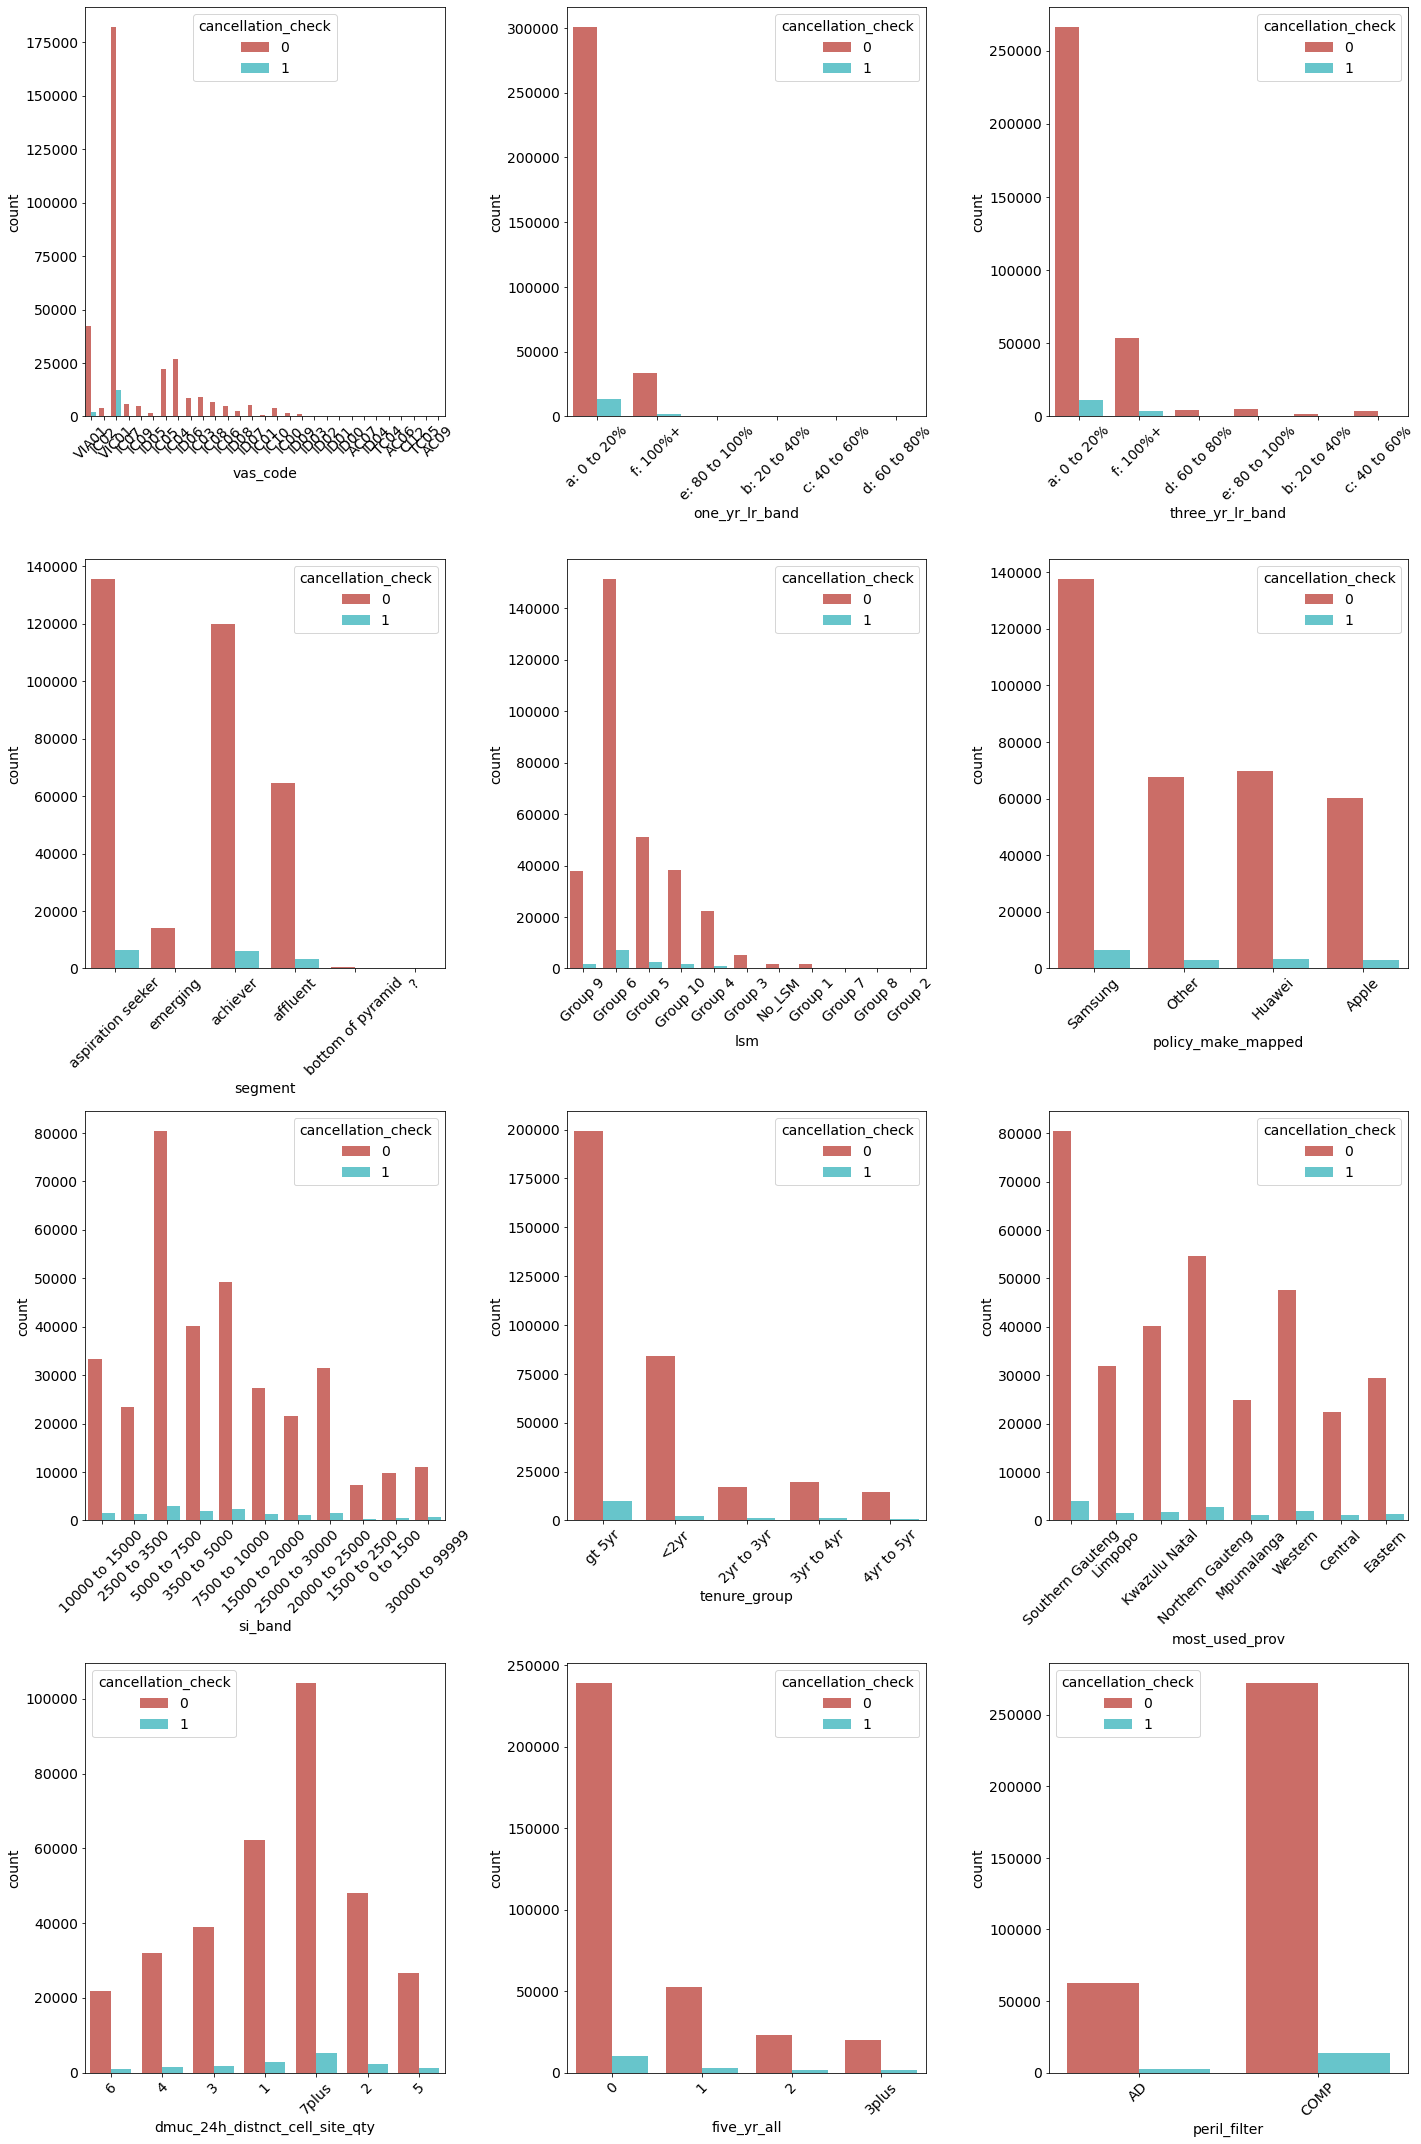

In [67]:
f, axes = plt.subplots(round(len(objects)/3), 3,  figsize=(20, 30))  
y = 0
for name in objects:
    i, j = divmod(y, 3)
    ax = sns.countplot(x = pandas_df[name],data = pandas_df, ax=axes[i, j],  hue='cancellation_check', palette="hls")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    y = y + 1
plt.tight_layout()
plt.show()



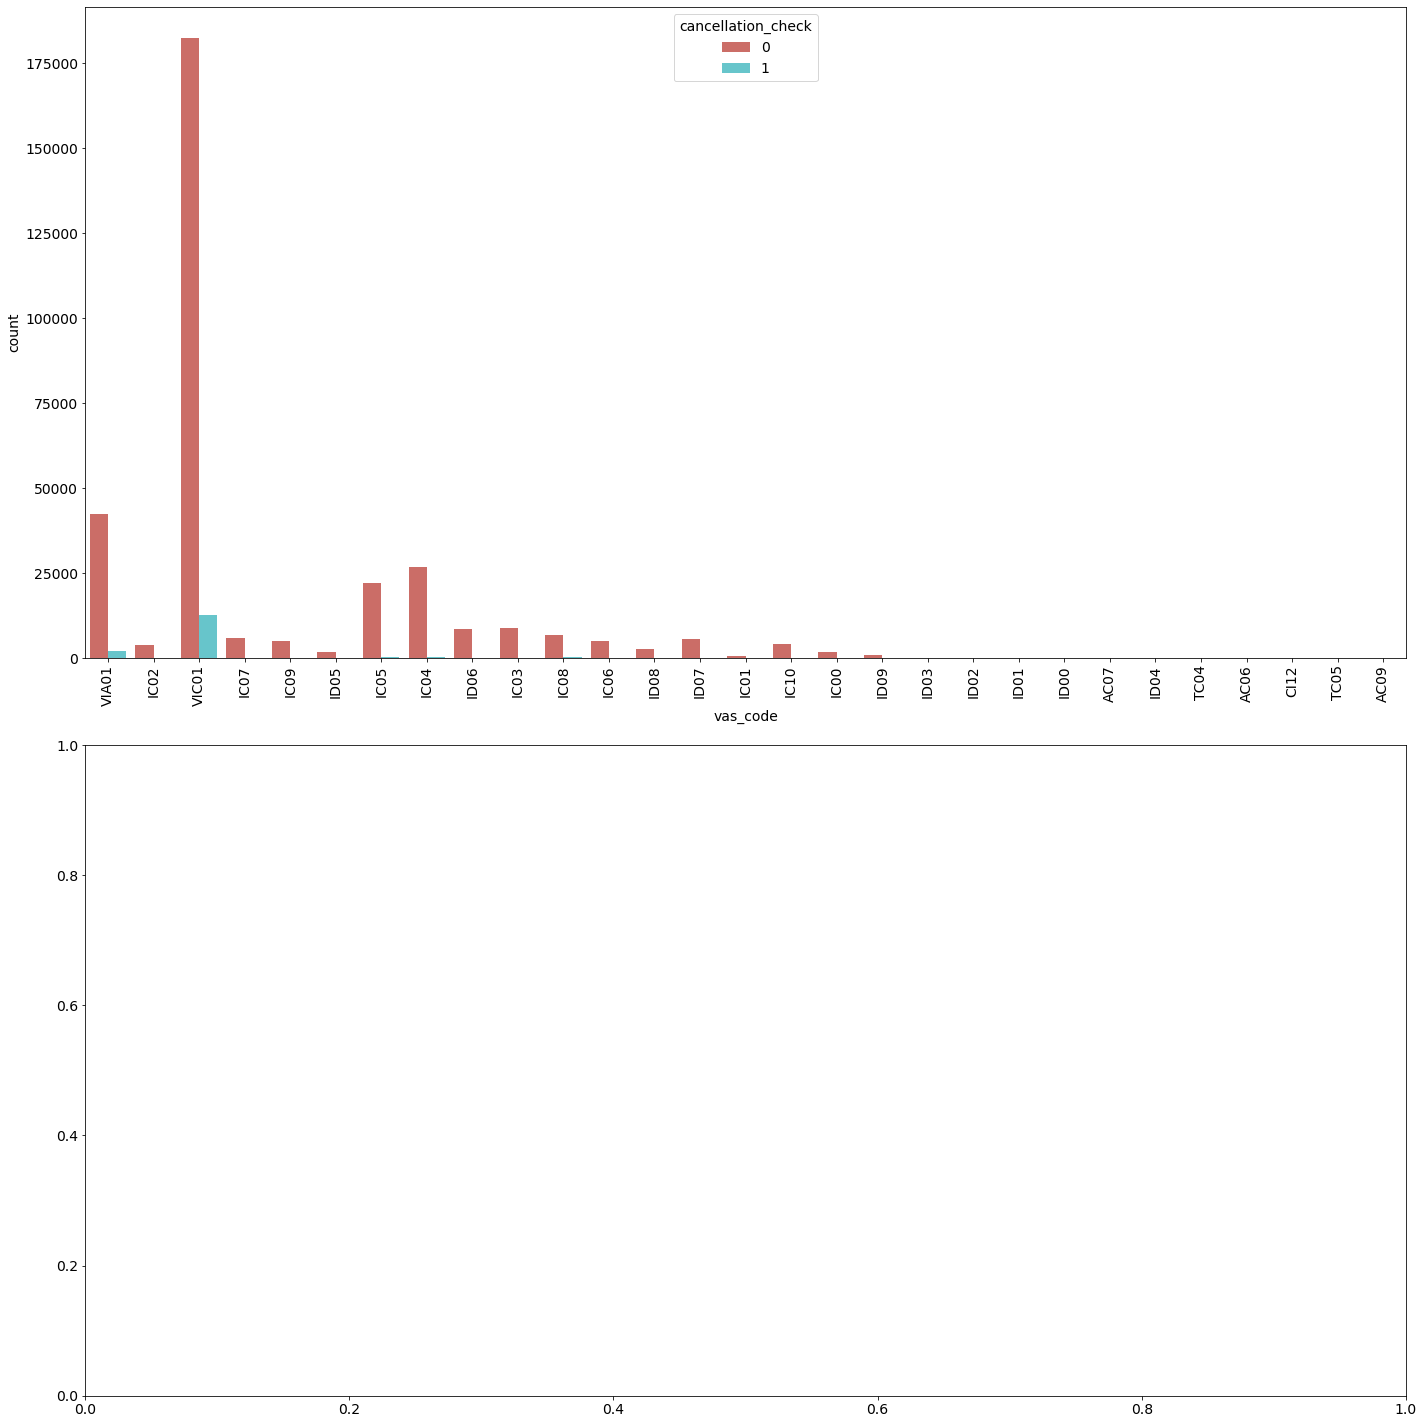

In [68]:
f, axes = plt.subplots(2,1,  figsize=(20, 20))  
y = 0;
vis_objects = ['vas_code']
for name in vis_objects:
    ax = sns.countplot(x = pandas_df[name], data = pandas_df, ax=axes[y], palette="hls", hue="cancellation_check")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    y = y + 1

plt.tight_layout()
plt.show()

In [71]:
pandas_df_woo = pandas_df

In [72]:
pandas_df = s

# Multivariate Analysis: Non-Graphical

In [73]:
round(pandas_df.corr(),2)

actual_premium  tenure  one_yr_loss_ratio  \
actual_premium                    1.00    0.13               0.04   
tenure                            0.13    1.00              -0.05   
one_yr_loss_ratio                 0.04   -0.05               1.00   
three_yr_loss_ratio               0.03   -0.08               0.70   
lr_increase                       0.11    0.05               0.57   
tp_2                              0.70   -0.01               0.07   
psr_2                             0.00   -0.01              -0.00   
psr_2_increase_loading            0.11   -0.20               0.08   
premium_increase                  0.13   -0.00               0.56   
new_premium_2                     1.00    0.13               0.05   
new_premium_psr                   0.00   -0.01              -0.00   
monetary_increase                 0.93    0.11               0.21   
count_th_lo                       0.02   -0.01               0.01   
count_ad_repair                   0.01    0.00               0.00   
count_ad_replace                  0.00    0.00               0.00   
count_ad                          0.01    0.00               0.01   
gross_ad_repair                   0.04    0.01               0.00   
gross_ad_replace                  0.02    0.00               0.00   
gross_ad                          0.04    0.01               0.00   
gross_th_lo                       0.06   -0.00               0.01   
one_yr_all                        0.02    0.00               0.03   
three_yr_all                      0.03    0.01               0.03   
one_yr_claims                     0.07    0.00               0.03   
three_yr_claims                   0.07    0.01               0.03   
five_yr_claims                    0.07    0.01               0.03   
net_th_lo                         0.06   -0.00               0.01   
net_ad_repair                     0.04    0.01               0.00   
net_ad_replace                    0.02    0.00               0.00   
ad_loss_of_si                     0.00    0.00              -0.00   
insured_value                     0.75    0.07               0.02   
cancellation_check                0.03    0.07               0.01   

                        three_yr_loss_ratio  lr_increase  tp_2  psr_2  \
actual_premium                         0.03         0.11  0.70   0.00   
tenure                                -0.08         0.05 -0.01  -0.01   
one_yr_loss_ratio                      0.70         0.57  0.07  -0.00   
three_yr_loss_ratio                    1.00         0.39  0.05  -0.00   
lr_increase                            0.39         1.00  0.12  -0.00   
tp_2                                   0.05         0.12  1.00  -0.01   
psr_2                                 -0.00        -0.00 -0.01   1.00   
psr_2_increase_loading                 0.06         0.10  0.54  -0.01   
premium_increase                       0.39         0.97  0.25  -0.00   
new_premium_2                          0.04         0.14  0.70  -0.00   
new_premium_psr                        0.00        -0.00 -0.01   1.00   
monetary_increase                      0.15         0.40  0.71  -0.00   
count_th_lo                            0.01         0.02  0.03  -0.00   
count_ad_repair                        0.01         0.02  0.01  -0.00   
count_ad_replace                       0.00         0.01  0.00  -0.00   
count_ad                               0.01         0.02  0.01  -0.00   
gross_ad_repair                        0.00         0.02  0.03  -0.00   
gross_ad_replace                       0.00         0.01  0.02  -0.00   
gross_ad                               0.01         0.02  0.03  -0.00   
gross_th_lo                            0.01         0.02  0.07  -0.00   
one_yr_all                             0.03         0.07  0.03  -0.00   
three_yr_all                           0.03         0.07  0.03  -0.00   
one_yr_claims                          0.03         0.05  0.07  -0.00   
three_yr_claims                        0.03         0.06  0.07 

# Multivariate Analysis: Graphical

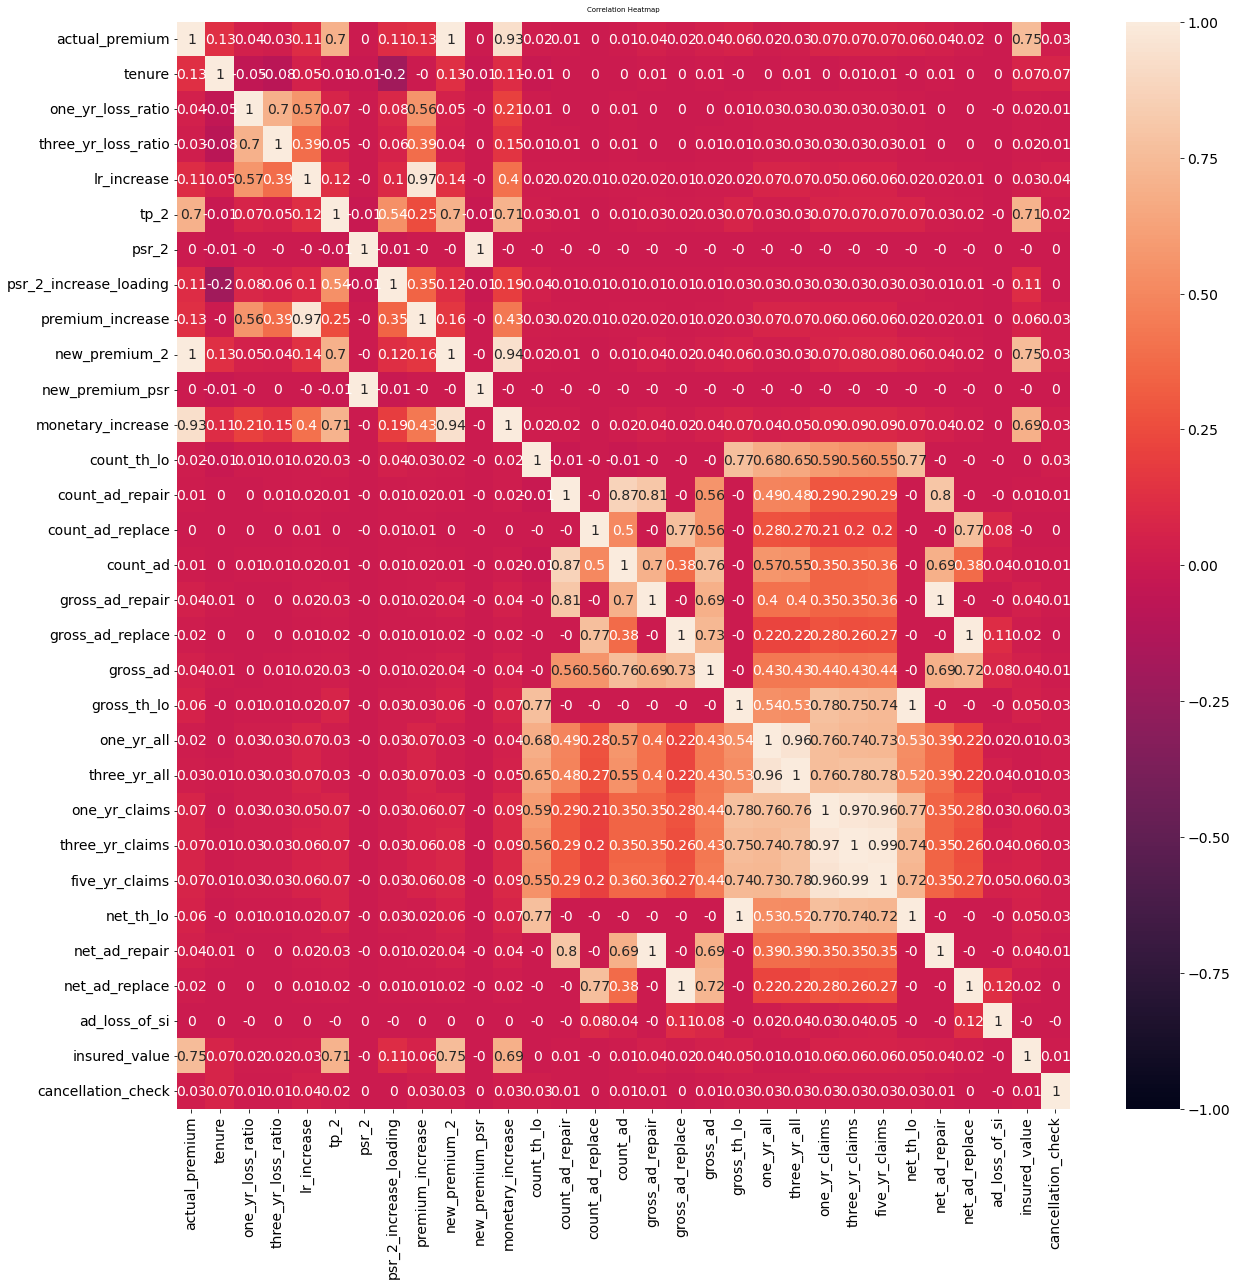

In [74]:
#Heatmap
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(round(pandas_df.corr(),2), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':7}, pad=10);

<AxesSubplot:>

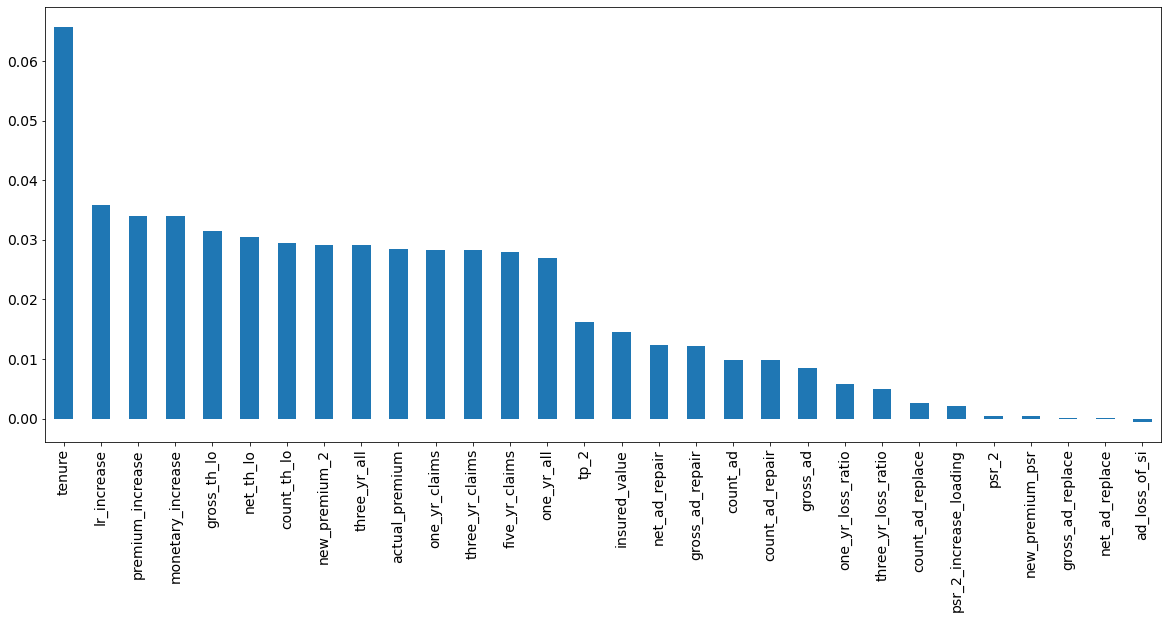

In [75]:
plt.figure(figsize=(20,8))
pandas_df.corr()['cancellation_check'].sort_values(ascending = False)[1:].plot(kind='bar')

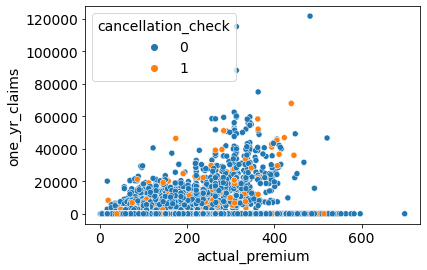

In [76]:
#Scatterplot
sns.scatterplot(x='actual_premium',y='one_yr_claims',hue='cancellation_check', data=pandas_df_woo);

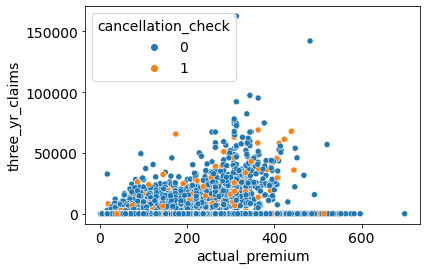

In [77]:
#Scatterplot
sns.scatterplot(x='actual_premium',y='three_yr_claims',hue='cancellation_check', data=pandas_df_woo);

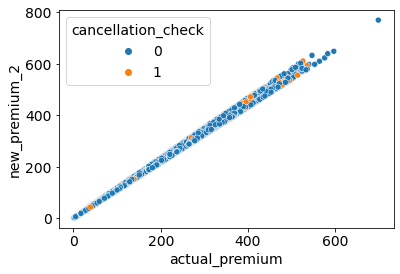

In [78]:
#Scatterplot
sns.scatterplot(x='actual_premium',y='new_premium_2',hue='cancellation_check', data=pandas_df_woo);

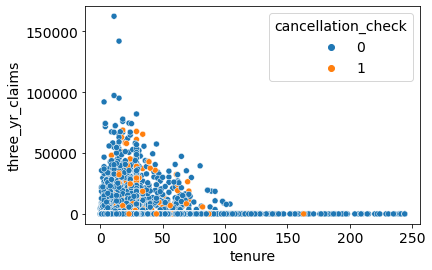

In [79]:
#Scatterplot
sns.scatterplot(x='tenure',y='three_yr_claims',hue='cancellation_check', data=pandas_df_woo);

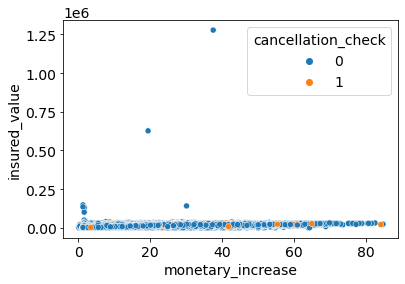

In [80]:
#Scatterplot
sns.scatterplot(x='monetary_increase',y='insured_value',hue='cancellation_check', data=pandas_df_woo);

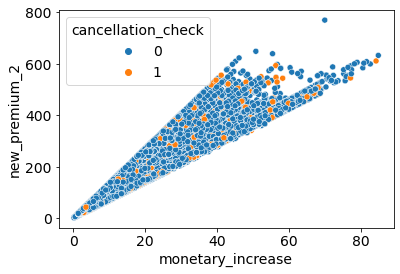

In [81]:
#Scatterplot
sns.scatterplot(x='monetary_increase',y='new_premium_2',hue='cancellation_check', data=pandas_df_woo);

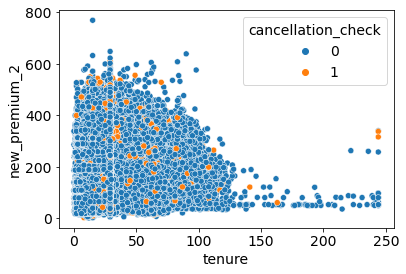

In [82]:
#Scatterplot
sns.scatterplot(x='tenure',y='new_premium_2',hue='cancellation_check', data=pandas_df_woo);

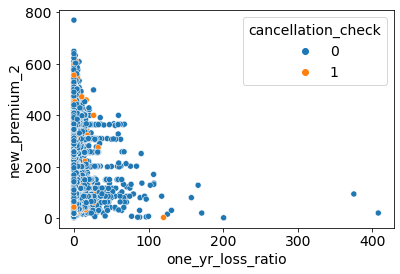

In [83]:
#Scatterplot
sns.scatterplot(x='one_yr_loss_ratio',y='new_premium_2',hue='cancellation_check', data=pandas_df_woo);

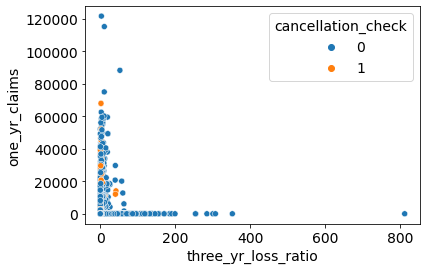

In [84]:
#Scatterplot
sns.scatterplot(x='three_yr_loss_ratio',y='one_yr_claims',hue='cancellation_check', data=pandas_df_woo);

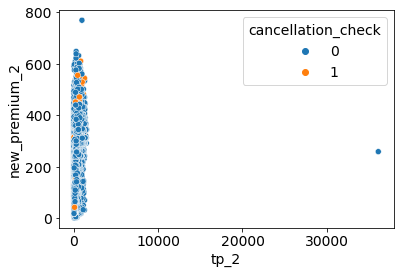

In [85]:
#Scatterplot
sns.scatterplot(x='tp_2',y='new_premium_2',hue='cancellation_check', data=pandas_df_woo);

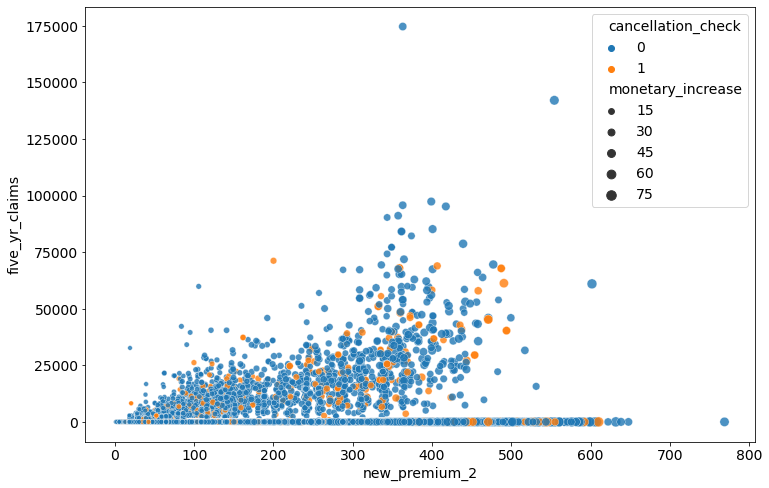

In [86]:
#Bubble Plots
plt.figure(figsize=(12,8))
sns.scatterplot(x="new_premium_2",
                y="five_yr_claims",
                size="monetary_increase",
                sizes=(20,100),
                alpha=0.8,
                hue="cancellation_check",
                data=pandas_df_woo);

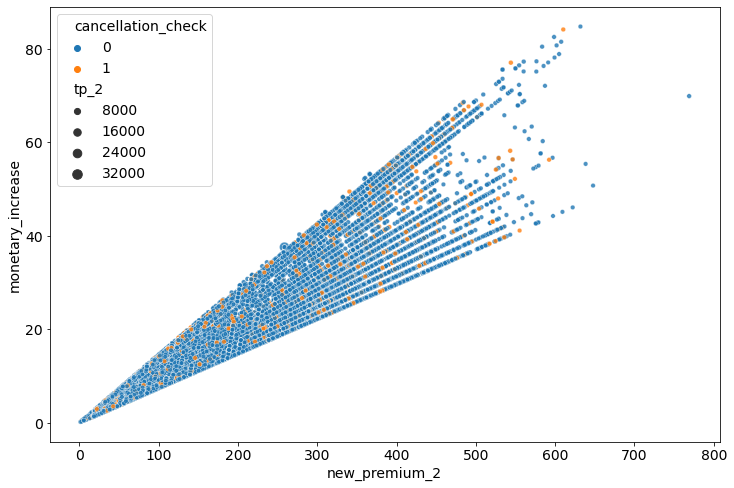

In [87]:
#Bubble Plots
plt.figure(figsize=(12,8))
sns.scatterplot(x="new_premium_2",
                y="monetary_increase",
                size="tp_2",
                sizes=(20,100),
                alpha=0.8,
                hue="cancellation_check",
                data=pandas_df_woo);

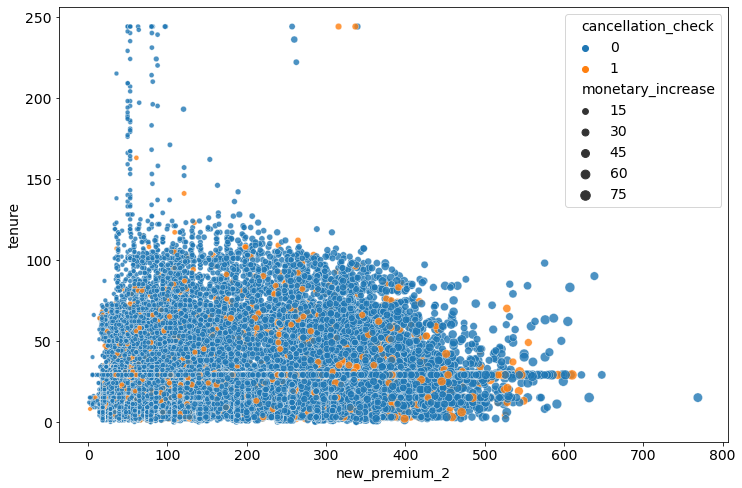

In [88]:
#Bubble Plots
plt.figure(figsize=(12,8))
sns.scatterplot(x="new_premium_2",
                y="tenure",
                size="monetary_increase",
                sizes=(20,100),
                alpha=0.8,
                hue="cancellation_check",
                data=pandas_df_woo);

In [ ]:
#Joint Plot
# sns.jointplot(x = 'actual_premium', y = 'tenure', data = pandas_df_woo)

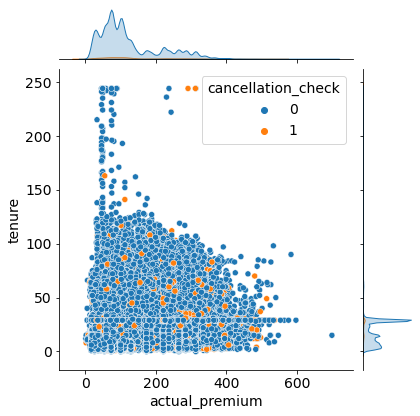

In [89]:
sns.jointplot(x = 'actual_premium', y = 'tenure', data = pandas_df_woo, hue='cancellation_check')

## Feature Selection

In [90]:
c = pandas_df.corr().abs()
c = c[c>.93]
s = c.unstack()
so = s.sort_values(kind="quicksort")

In [91]:
so.head(30)

new_premium_2      monetary_increase    0.939829
monetary_increase  new_premium_2        0.939829
one_yr_claims      five_yr_claims       0.955129
five_yr_claims     one_yr_claims        0.955129
three_yr_all       one_yr_all           0.958962
one_yr_all         three_yr_all         0.958962
lr_increase        premium_increase     0.967946
premium_increase   lr_increase          0.967946
one_yr_claims      three_yr_claims      0.969722
three_yr_claims    one_yr_claims        0.969722
                   five_yr_claims       0.989431
five_yr_claims     three_yr_claims      0.989431
gross_ad_replace   net_ad_replace       0.995822
net_ad_replace     gross_ad_replace     0.995822
gross_th_lo        net_th_lo            0.995895
net_th_lo          gross_th_lo          0.995895
net_ad_repair      gross_ad_repair      0.999025
gross_ad_repair    net_ad_repair        0.999025
actual_premium     new_premium_2        0.999320
new_premium_2      actual_premium       0.999320
new_premium_psr    p

In [92]:
# Create correlation matrix
corr_matrix = pandas_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.93)]



In [93]:
to_drop
#Potential features to drop

['premium_increase',
 'new_premium_2',
 'new_premium_psr',
 'monetary_increase',
 'three_yr_all',
 'three_yr_claims',
 'five_yr_claims',
 'net_th_lo',
 'net_ad_repair',
 'net_ad_replace']

In [94]:
from dython.nominal import associations 

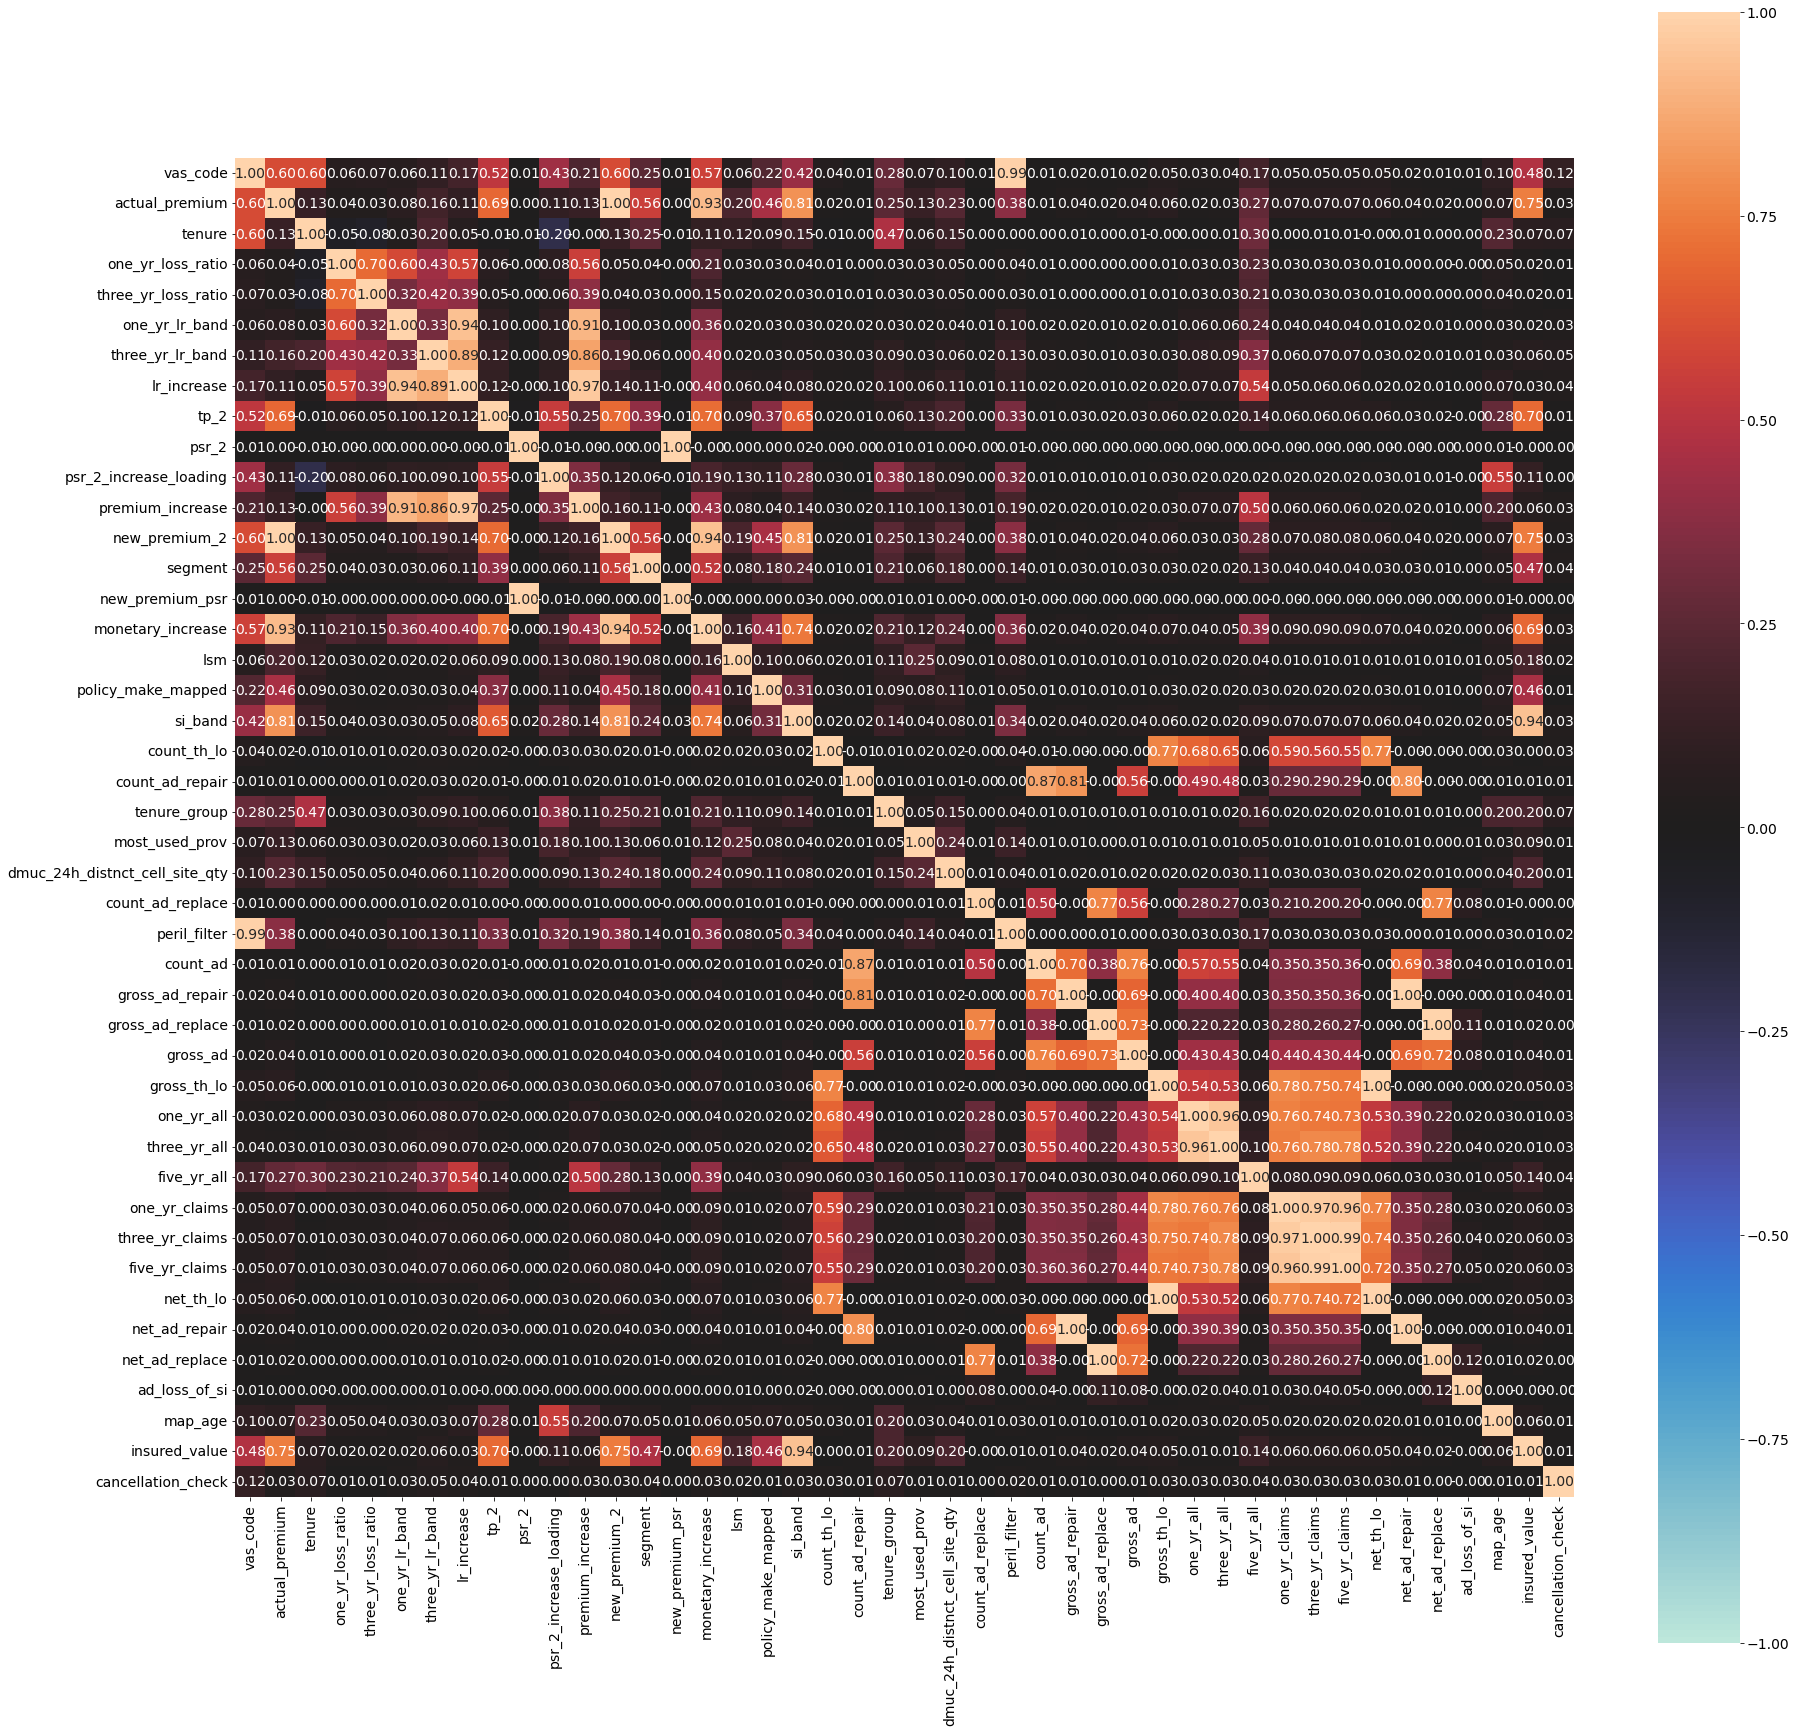

In [95]:
complete_correlation= associations(pandas_df, figsize=(30,30))

In [96]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [97]:
c = df_complete_corr
c = c[c>.93]
s = c.unstack()
so = s.sort_values(kind="quicksort")

In [98]:
so.head(30)

lr_increase        one_yr_lr_band       0.939800
one_yr_lr_band     lr_increase          0.939800
monetary_increase  new_premium_2        0.939829
new_premium_2      monetary_increase    0.939829
insured_value      si_band              0.941576
si_band            insured_value        0.941576
five_yr_claims     one_yr_claims        0.955129
one_yr_claims      five_yr_claims       0.955129
one_yr_all         three_yr_all         0.958962
three_yr_all       one_yr_all           0.958962
premium_increase   lr_increase          0.967946
lr_increase        premium_increase     0.967946
three_yr_claims    one_yr_claims        0.969722
one_yr_claims      three_yr_claims      0.969722
five_yr_claims     three_yr_claims      0.989431
three_yr_claims    five_yr_claims       0.989431
peril_filter       vas_code             0.989640
vas_code           peril_filter         0.989640
gross_ad_replace   net_ad_replace       0.995822
net_ad_replace     gross_ad_replace     0.995822
net_th_lo          g

In [99]:
# Create correlation matrix
corr_matrix = df_complete_corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.93)]



In [100]:
to_drop

['lr_increase',
 'premium_increase',
 'new_premium_2',
 'new_premium_psr',
 'monetary_increase',
 'peril_filter',
 'three_yr_all',
 'three_yr_claims',
 'five_yr_claims',
 'net_th_lo',
 'net_ad_repair',
 'net_ad_replace',
 'insured_value']

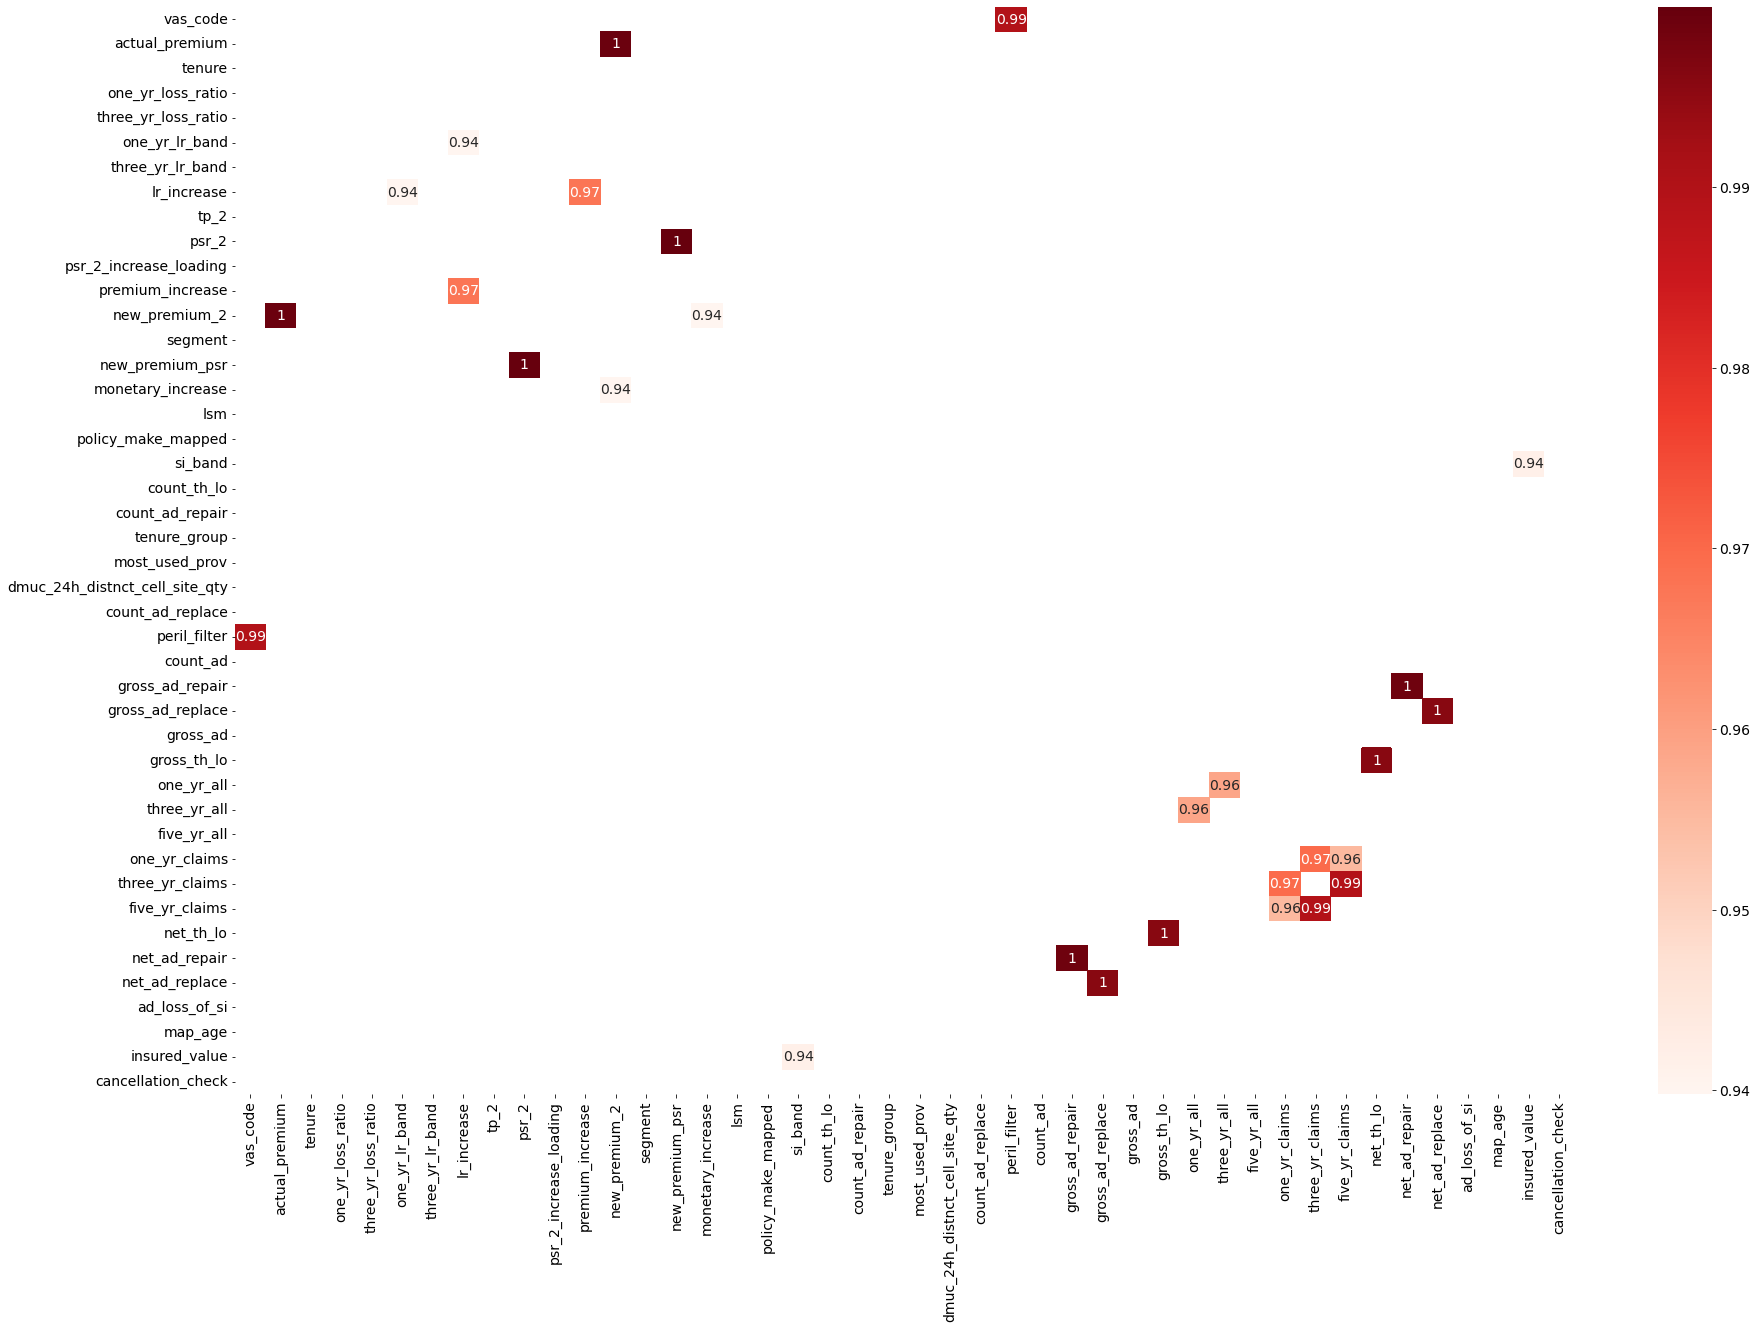

In [101]:
dfCorr = df_complete_corr
filteredDf = dfCorr[((dfCorr >= .93) | (dfCorr <= -.93)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,20))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [102]:
categorical_columns = pandas_df.select_dtypes('object').columns 
categorical_columns

Index(['vas_code', 'one_yr_lr_band', 'three_yr_lr_band', 'segment', 'lsm',
       'policy_make_mapped', 'si_band', 'tenure_group', 'most_used_prov',
       'dmuc_24h_distnct_cell_site_qty', 'peril_filter', 'five_yr_all',
       'map_age'],
      dtype='object')

In [103]:
chi2_array, p_array = [], []
for column in categorical_columns:
    crosstab = pd.crosstab(pandas_df[column], pandas_df['cancellation_check'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)
 
df_chi = pd.DataFrame({
    'Variable': categorical_columns,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

Variable   Chi-square        p-value
0                         vas_code  4731.983201   0.000000e+00
7                     tenure_group  1647.604610   0.000000e+00
2                 three_yr_lr_band   722.606316  6.353390e-154
11                     five_yr_all   512.725226  8.334101e-111
3                          segment   478.202871  4.041334e-101
6                          si_band   403.693111   1.540557e-80
1                   one_yr_lr_band   269.684520   3.270962e-56
10                    peril_filter   203.051204   4.508327e-46
8                   most_used_prov    60.532923   1.181420e-10
12                         map_age    45.591559   1.049658e-07
4                              lsm    36.038688   8.289711e-05
5               policy_make_mapped    16.863534   7.539130e-04
9   dmuc_24h_distnct_cell_site_qty     9.043592   1.711413e-01

In [104]:
#Based on the suggested columns to drop, I am choosing which ones to drop instead since they give the same information
actual_drop = ['one_yr_lr_band',
 'premium_increase',
 'actual_premium',
 'monetary_increase',
 'new_premium_psr',
 'vas_code',
 'one_yr_all',
 'one_yr_claims',
 'three_yr_claims',
 'net_th_lo',
 'net_ad_repair',
 'net_ad_replace',
 'si_band']

#### drop fearures

In [105]:
pandas_df

vas_code  actual_premium  tenure  one_yr_loss_ratio  \
0         VIA01              60      24           0.000000   
1          IC02              36      14           0.000000   
2         VIC01              93      25           3.377747   
3         VIC01              39      21           0.000000   
4         VIC01             129      29           0.000000   
...         ...             ...     ...                ...   
350995    VIC01              39      23           0.000000   
350996     IC06             129       5           0.000000   
350997    VIA01              89      29           0.000000   
350998     IC05             100       6           0.000000   
350999    VIC01             181      29           0.000000   

        three_yr_loss_ratio one_yr_lr_band three_yr_lr_band  lr_increase  \
0                  0.000000    a: 0 to 20%      a: 0 to 20%         0.00   
1                  0.000000    a: 0 to 20%      a: 0 to 20%         0.00   
2                  1.696512       f: 100%+         f: 100%+         0.07   
3                  0.000000    a: 0 to 20%      a: 0 to 20%         0.00   
4                  0.000000    a: 0 to 20%      a: 0 to 20%         0.00   
...                     ...            ...              ...          ...   
350995             0.000000    a: 0 to 20%      a: 0 to 20%         0.00   
350996             0.000000    a: 0 to 20%      a: 0 to 20%         0.00   
350997             0.000000    a: 0 to 20%      a: 0 to 20%         0.00   
350998             0.000000    a: 0 to 20%      a: 0 to 20%         0.00   
350999             0.000000    a: 0 to 20%      a: 0 to 20%         0.00   

              tp_2     psr_2  ...  one_yr_claims  three_yr_claims  \
0        50.180020  1.195695  ...            0.0              0.0   
1        66.014441  0.545335  ...            0.0              0.0   
2       159.746198  0.582173  ...            0.0              0.0   
3        21.873019  1.783019  ...            0.0              0.0   
4       101.896892  1.265986  ...            0.0              0.0   
...            ...       ...  ...            ...              ...   
350995   73.171005  0.532998  ...            0.0              0.0   
350996  308.588526  0.418032  ...            0.0              0.0   
350997  133.104290  0.668649  ...            0.0              0.0   
350998  158.030915  0.632788  ...            0.0              0.0   
350999   24.144603  7.496499  ...            0.0              0.0   

        five_yr_claims net_th_lo  net_ad_repair  net_ad_replace ad_loss_of_si  \
0                  0.0       0.0            0.0             0.0           0.0   
1                  0.0       0.0            0.0             0.0           0.0   
2                  0.0       0.0            0.0             0.0           0.0   
3                  0.0       0.0            0.0             0.0           0.0   
4                  0.0       0.0            0.0             0.0           0.0   
...                ...       ...            ...             ...           ...   
350995             0.0       0.0            0.0             0.0           0.0   
350996             0.0       0.0            0.0             0.0           0.0   
350997             0.0       0.0            0.0             0.0           0.0   
350998             0.0       0.0            0.0             0.0           0.0   
350999             0.0       0.0            0.0             0.0           0.0   

         map_age insured_value  cancellation_check  
0       51 to 60   7543.281014                   0  
1       31 to 40   2187.820175                   0  
2       31 to 40   3882.335403                   0  
3       61 to 70   3833.837366                   0  
4       51 to 60   5823.499222                   0  
...          ...           ...                 ...  
350995  31 to 40   1941.171584                   1  
350996  21 to 30   8026.006420                   0  
350997  41 to 50  15086.554484                   0  
350998  41 to 50 

In [106]:
# Drop features 
pandas_df.drop(actual_drop, axis=1, inplace=True)
pandas_drop =pandas_df

In [107]:
pandas_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351000 entries, 0 to 350999
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tenure                          351000 non-null  int32  
 1   one_yr_loss_ratio               351000 non-null  float64
 2   three_yr_loss_ratio             351000 non-null  float64
 3   three_yr_lr_band                351000 non-null  object 
 4   lr_increase                     351000 non-null  float64
 5   tp_2                            348437 non-null  float64
 6   psr_2                           348437 non-null  float64
 7   psr_2_increase_loading          348437 non-null  float64
 8   new_premium_2                   351000 non-null  float64
 9   segment                         351000 non-null  object 
 10  lsm                             324768 non-null  object 
 11  policy_make_mapped              351000 non-null  object 
 12  count_th_lo     

In [108]:
pandas_drop.isnull().sum()

tenure                                0
one_yr_loss_ratio                     0
three_yr_loss_ratio                   0
three_yr_lr_band                      0
lr_increase                           0
tp_2                               2563
psr_2                              2563
psr_2_increase_loading             2563
new_premium_2                         0
segment                               0
lsm                               26232
policy_make_mapped                    0
count_th_lo                           0
count_ad_repair                       0
tenure_group                          0
most_used_prov                     3527
dmuc_24h_distnct_cell_site_qty     1500
count_ad_replace                      0
peril_filter                          0
count_ad                              0
gross_ad_repair                       0
gross_ad_replace                      0
gross_ad                              0
gross_th_lo                           0
three_yr_all                          0


In [109]:
pandas_drop = pandas_drop.fillna(-999)

### Feature Engeneering

In [110]:
# Finding all the categorical columns from the data
categorical_columns = pandas_drop.select_dtypes('object').columns 
categorical_columns

Index(['three_yr_lr_band', 'segment', 'lsm', 'policy_make_mapped',
       'tenure_group', 'most_used_prov', 'dmuc_24h_distnct_cell_site_qty',
       'peril_filter', 'five_yr_all', 'map_age'],
      dtype='object')

In [111]:
 # Finding all the numerical columns from the data
numerical_columns = pandas_drop.select_dtypes(include=['int64', 'int32','float64']).columns
numerical_columns

Index(['tenure', 'one_yr_loss_ratio', 'three_yr_loss_ratio', 'lr_increase',
       'tp_2', 'psr_2', 'psr_2_increase_loading', 'new_premium_2',
       'count_th_lo', 'count_ad_repair', 'count_ad_replace', 'count_ad',
       'gross_ad_repair', 'gross_ad_replace', 'gross_ad', 'gross_th_lo',
       'three_yr_all', 'five_yr_claims', 'ad_loss_of_si', 'insured_value',
       'cancellation_check'],
      dtype='object')

In [112]:
# Making a copy of the data to save the original data
original_df = pandas_drop

In [113]:
pandas_drop.isnull().sum()

tenure                            0
one_yr_loss_ratio                 0
three_yr_loss_ratio               0
three_yr_lr_band                  0
lr_increase                       0
tp_2                              0
psr_2                             0
psr_2_increase_loading            0
new_premium_2                     0
segment                           0
lsm                               0
policy_make_mapped                0
count_th_lo                       0
count_ad_repair                   0
tenure_group                      0
most_used_prov                    0
dmuc_24h_distnct_cell_site_qty    0
count_ad_replace                  0
peril_filter                      0
count_ad                          0
gross_ad_repair                   0
gross_ad_replace                  0
gross_ad                          0
gross_th_lo                       0
three_yr_all                      0
five_yr_all                       0
five_yr_claims                    0
ad_loss_of_si               

In [114]:
pandas_drop = pandas_drop.dropna()

In [115]:
# One hot encoding independent variable x
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [116]:
for feature in categorical_columns:
    pandas_drop = encode_and_bind(pandas_drop, feature)

pandas_drop.head()

tenure  one_yr_loss_ratio  three_yr_loss_ratio  lr_increase        tp_2  \
0      24           0.000000             0.000000         0.00   50.180020   
1      14           0.000000             0.000000         0.00   66.014441   
2      25           3.377747             1.696512         0.07  159.746198   
3      21           0.000000             0.000000         0.00   21.873019   
4      29           0.000000             0.000000         0.00  101.896892   

      psr_2  psr_2_increase_loading  new_premium_2  count_th_lo  \
0  1.195695                    0.00          64.80            0   
1  0.545335                    0.01          39.24            0   
2  0.582173                    0.01         107.88            0   
3  1.783019                    0.00          42.12            0   
4  1.265986                    0.00         139.32            0   

   count_ad_repair  ...  five_yr_all_2  five_yr_all_3plus  map_age_11 to 20  \
0                0  ...              0                  0                 0   
1                0  ...              0                  0                 0   
2                0  ...              1                  0                 0   
3                0  ...              0                  0                 0   
4                0  ...              0                  0                 0   

   map_age_21 to 30  map_age_31 to 40  map_age_41 to 50  map_age_51 to 60  \
0                 0                 0                 0                 1   
1                 0                 1                 0                 0   
2                 0                 1                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 1   

   map_age_61 to 70  map_age_71 to 80  map_age_81 to 90  
0                 0                 0                 0  
1                 0                 0                 0  
2                 0                 0                 0  
3                 1                 0                 0  
4                 0                 0                 0  

[5 rows x 85 columns]

In [117]:
pandas_drop.shape

(351000, 85)

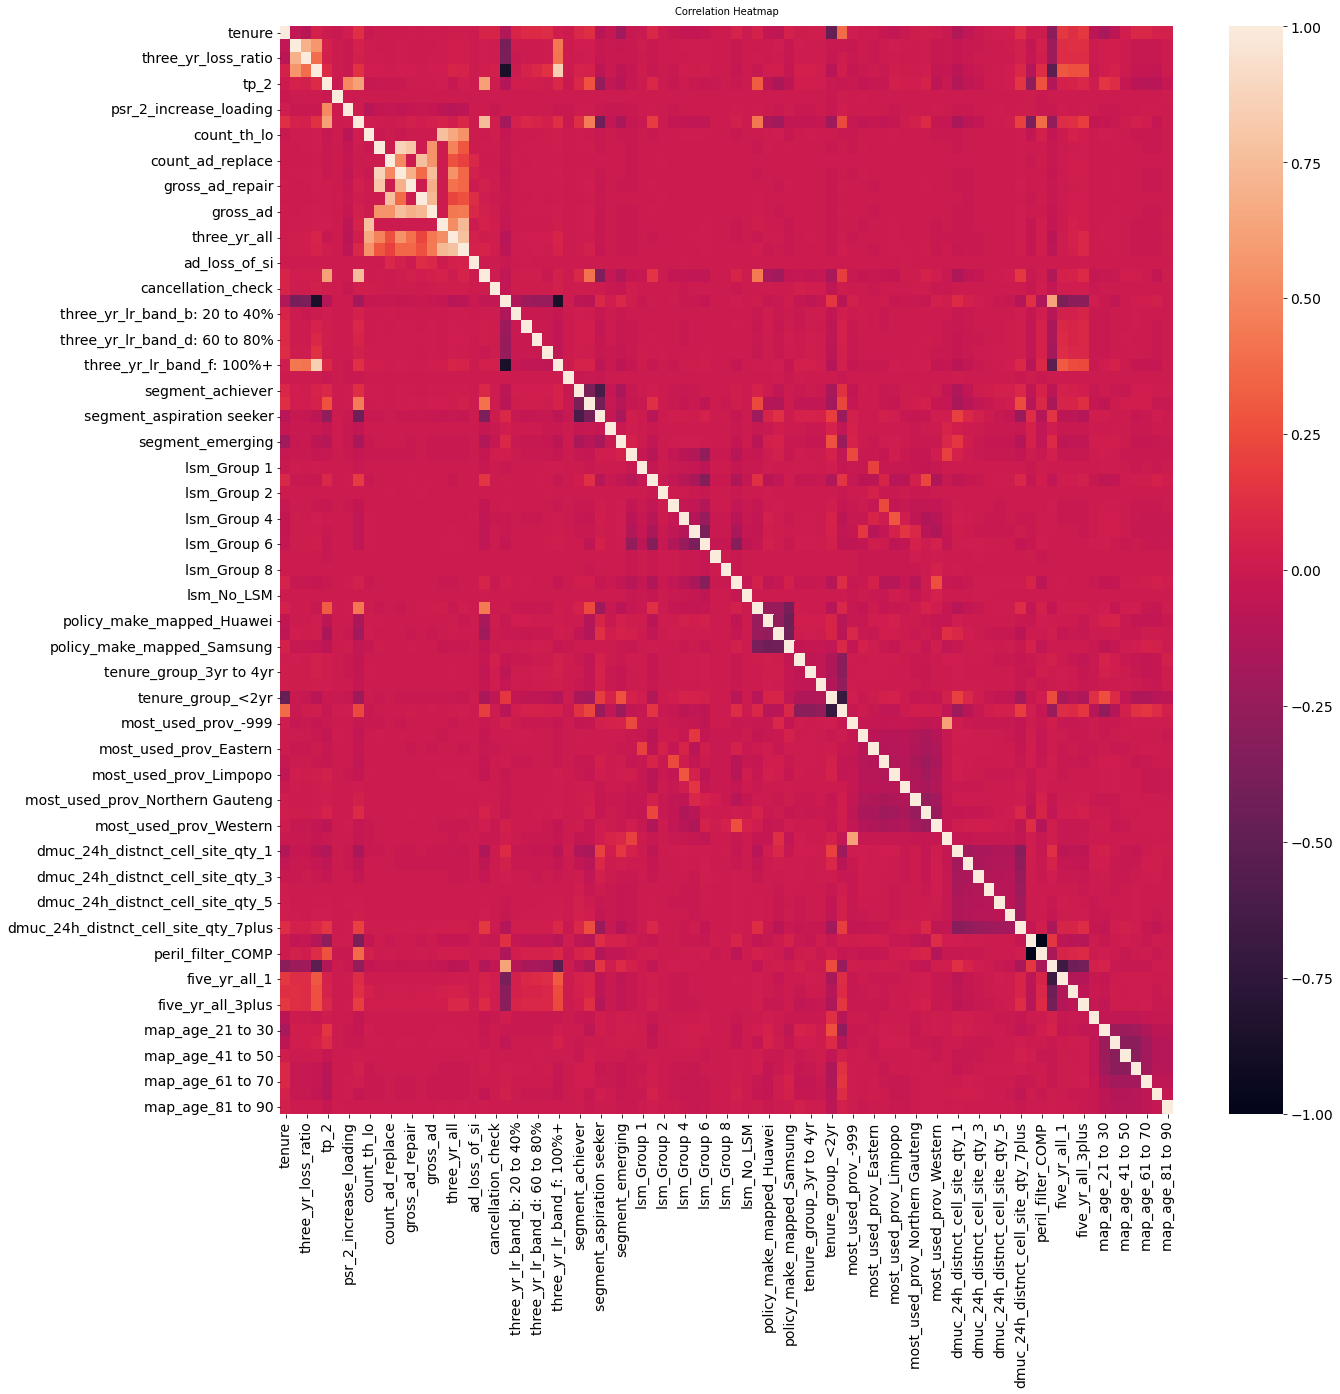

In [118]:
#Heatmap
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(round(pandas_drop.corr(),2), vmin=-1, vmax=1, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

<AxesSubplot:>

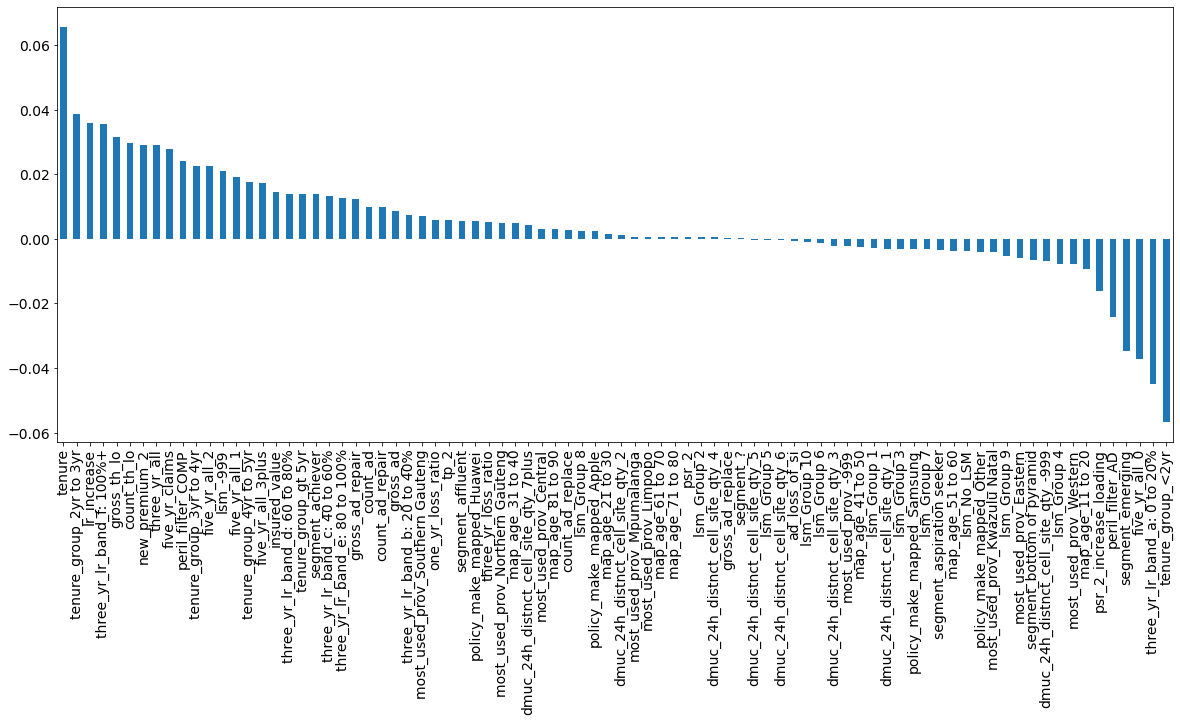

In [120]:
plt.figure(figsize=(20,8))
pandas_drop.corr()['cancellation_check'].sort_values(ascending = False)[1:].plot(kind='bar')

In [122]:
# Split the dataset into the response, y, and features, X
y = pandas_drop['cancellation_check']
X = pandas_drop.drop('cancellation_check', axis=1)

In [124]:
#We can then call the train_test_split function:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify =  y,random_state=50)

#Stratify will make sure your train and validation data are split based on output label frequencies based on train data. 
#Like if the data was like 90 to class 'A' and 10 to class 'B'.
#After split both train and validation will have 90:10 ratio of classes

 ## Random Under-Sampling

In [125]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')


In [126]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)


In [127]:
# summarize class distribution
print(Counter(y_under))

Counter({0: 12722, 1: 12722})


total class of 1 and 0: 1    12722
0    12722
Name: cancellation_check, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

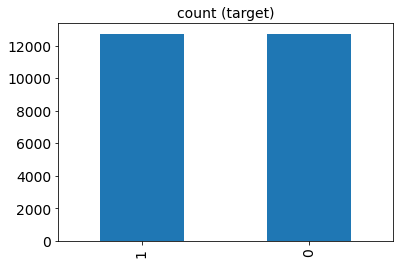

In [128]:
print("total class of 1 and 0:",y_under.value_counts())# plot the count after under-sampeling
y_under.value_counts().plot(kind='bar', title='count (target)')

## Random Over-Sampling

In [129]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [130]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy=0.5)

In [131]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [132]:
# summarize class distribution
print(Counter(y_over))

Counter({0: 268078, 1: 268078})


total class of 1 and 0: 1    268078
0    268078
Name: cancellation_check, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

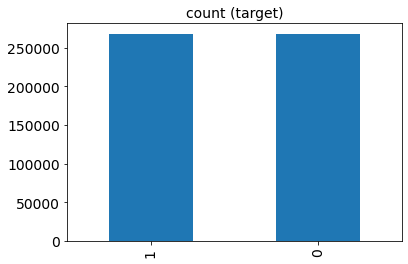

In [133]:
print("total class of 1 and 0:",y_over.value_counts())# plot the count after under-sampeling
y_over.value_counts().plot(kind='bar', title='count (target)')

## Random Over-Sampling + Under-Sampling

In [134]:
print(Counter(y_train))

Counter({0: 268078, 1: 12722})


In [135]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
X_f, y_f = over.fit_resample(X_train, y_train)


In [136]:
# summarize class distribution
print(Counter(y_f))

Counter({0: 268078, 1: 26807})


In [137]:
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_os_us, y_os_us = under.fit_resample(X_f, y_f)
# summarize class distribution
print(Counter(y_os_us))

Counter({0: 53614, 1: 26807})


In [138]:
sc.stop()